# D208 Predictive Modeling Performance Assessment Task #2
## **Medical Readmission**

### Natalie Toler

## Table of Contents
### Part 1. Research Question
#### A1. Research Question
#### A2. Objective and Goals

### Part 2. Method Justificaiton
#### B1. Assumptions
#### B2. Programming Language
#### B3. Justification of Regression

### Part 3. Data Prepatation and Manipulation
#### C1. Data Cleaning
#### C2. Data Exploration
#### C3. Visualizations
#### C4. Data Transformation
#### C5. Prepared dataset

### Part 4. Model Comparison and Analysis
#### D1. Initial Model
#### D2. Model Reduction and Justification
#### D3. Reduced Model

#### E1. Model Comparison
#### E2. Residual Plot
#### E3. Code

### Part 5. Data Summary and Implications
#### F1. Regression Equation, etc
#### F2. Recommendations

### Part 6. Demonstration
#### G. Panopto Video

### Sources
#### H. Web Sources
#### I Source references

## Part 1

### A1. Research Question

Which variables are associated with a higher rate of readmission?

### A2. Objective and Goals

The objective of my analysis is to see which observed variables, if any, effect whether a patient will be readmitted to hospital. The goal will be to predict whether a patient will likely be readmitted and further on mitigate those variables so that readmission rates will decrease.

## Part 2

### B1. Assumptions of the Logistic Regression Model

There are 6 assumptions that need to be met in order to successful run a logistic regression model. Four of these assumptions are: [Assumptions of Logistic Regression](https://www.statology.org/assumptions-of-logistic-regression/)

1. The response variable is Binary - The response variable is the variable that is being tested against the others to see if it is affected. In the case of my research question the dependent variable is the rate of readmission. In order for the model to work this variable must only have two values. In this case the values are yes or no. 
    
2. The observations are independent - This means that each value in the dataset should not be connected or come from repeated measurements. To test for independence we will create a plot of reiduals over time and expect to see a random pattern. 
    
3. There is no multicollinearity amoung the independent variables - Multicollinearity is when independent variables are correlated to each other. If independent variables are affecting eachother along with the dependent variable it can skew the results and fit of a model. To test this we will use the variance inflation factor method which will test the strength of correlation amoungst the dependent variables.
    
4. There are no extreme outliers - The dataset needs to be free from any outliers in the data. Having outliers in the dataset will drag the regression line away from the best fit for the data. 

### B2. Programming Language

I will be using python as the programming language for this project. Python is an open source programming language with a vast array of libraries and packages that allow for flexibility and creativity when working on data projects. Since the syntax is consistent across libraries it is easy to grab new tools to cater to each specific question or goal of the project. Python code is also easy to recreate, update, and add to. [R or Python](https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html) Within python I will be using the following resources:

- pandas which will handle reading and processing the dataset from the csv file. [Pandas](https://pandas.pydata.org/docs/getting_started/overview.html)
- NumPy which allows certain mathematics and categorizing of values in the dataset. [NumPy](https://numpy.org/devdocs/user/whatisnumpy.html)
- MatPlotLib which provides graphing functionality [MatPlotLib](https://matplotlib.org/stable/users/explain/quick_start.html)
- Seaborn which provides further customization of the graphs [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
- SciPy and it's stats models which provide the functionality for the regression model, residual plotting, and finding issues of multicolinearity [SciPy StatsModels](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)
- sklearn which helps to transform the data [SciKit Learn](https://scikit-learn.org/stable/user_guide.html)

### B3. Justification of Regression

Logistic regression is the appropriate regression model for this project because the dependent variable being tested is a yes/no binary. [What is Logistic Regression?](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/) This regression works when the independent variables are nominal, ordinal, or quantitative. In this case we have all three of these variable types to test against the binary categorical dependent variable. 

## Part 3

### C1. Data Cleaning

My goal for the data cleaning step is to ensure uniformity within the structure of the data so that it will be easier to pull out the variables I want to work with for this project. Part of that structure includes detecting duplicates, fixing any null values as needed, and standardizing the names of the columns. Since I have worked with this data set before I have a good idea of the areas that need to be cleaned before I can start my analysis. 

Since I am working with a logistic model I will also be checking for outliers in order to check off the assumption that there are no outliers. 

I will use `info()` to check for null values and the datatypes for each column. I will also use `value_counts()` to look at the values of each column to ensure consistency. And I will use `nunique()` to check for any duplicated rows. 

Using my previous project in D206 I will be making some changes to the data. I will adjust the zipcodes so that the leading zeros return, I will restructure the timezones so that they are categorized by time zone alone and not additionally by the city. 

I will remap all boolean categories to be 1/0 binaries so that they can be used for the model. The survey questions can be encoded for nominal order, in the survey 1 is most likely and 8 is least likely. 
All categorical columns that are nominal I will be using the one hot encoding method so that those variables can be used in the model. The explanation and coding for these transformational methods will be explained and shown in C4.

I will also rename the columns to be consistently lowercase and with underscores and change the datatypes of the columns, specifically the categorical columns from string to category.

The process of cleaning is shown below with annotation in the code to explain the process.

In [146]:
# Before starting I will set up the space, loading in the needed libraries and data that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sb
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

#Import the dataset and make sure the bonus column is not created.
df = pd.read_csv('medical_clean.csv', index_col=0)
# Check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [147]:
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [148]:
#Adjusting the Zipcode column 
# Convert the Zip column to a string and then pad any values with 4 numbers with a leading 0
df['Zip'] = df['Zip'].astype("str").str.zfill(5)

# Check the column type
df['Zip'].value_counts()

Zip
25674    4
78104    4
68355    4
62098    4
24136    4
        ..
18337    1
58442    1
71353    1
81612    1
15108    1
Name: count, Length: 8612, dtype: int64

In [149]:
# Check that all values are 5 long
all_have_five_values = all(len(str(value)) == 5 for value in df['Zip'])
print(all_have_five_values)

True


In [150]:
#Simplifying the Timezone categories
df.TimeZone.replace({
    # Puerto Rica has it's own time zone
    'America/Puerto_Rico' : "US - Puerto Rico",
    # All the cities in the US Eastern zone
    'America/New_York' : 'US - Eastern',
    'America/Detroit' : 'US - Eastern',
    'America/Indiana/Indianapolis' : 'US - Eastern',
    'America/Indiana/Vevay' : 'US - Eastern',
    'America/Indiana/Vincennes' : 'US - Eastern',
    'America/Kentucky/Louisville' : 'US - Eastern',
    'America/Toronto' : 'US - Eastern',
    'America/Indiana/Marengo' : 'US - Eastern',
    'America/Indiana/Winamac' : 'US - Eastern',
    # All the cities in US Central zone
    'America/Chicago' : 'US - Central',
    'America/Menominee' : 'US - Central',
    'America/Indiana/Knox' : 'US - Central',
    'America/Indiana/Tell_City' : 'US - Central',
    'America/North_Dakota/Beulah' : 'US - Central',
    'America/North_Dakota/New_Salem' : 'US - Central',
    # All the Cities in US Mountain zone
    'America/Denver' : 'US - Mountain',
    'America/Boise' : 'US - Mountain',
    # Arizona which is Mountain but doesn't observe day light savings
    'America/Phoenix' : 'US - Arizona',
    # The city in Pacific time
    'America/Los_Angeles' : 'US - Pacific',
    # Alaskan Time zone
    'America/Nome' : 'US - Alaskan',
    'America/Anchorage' : 'US - Alaskan',
    'America/Sitka' : 'US - Alaskan',
    'America/Yakutat' : 'US - Alaskan',
    # Hawaiian Time Zone that doesn't observe day light savings
    'Pacific/Honolulu' : 'US - Hawaiian',
    # Aleutian time zone that observes day light savings and otherwise would be with Hawaiian
    'America/Adak' : 'US - Aleutian'
    }, inplace = True)

df['TimeZone'].value_counts()

C:\Users\natal\AppData\Local\Temp\ipykernel_35880\318613104.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.TimeZone.replace({


TimeZone
US - Eastern        4326
US - Central        3792
US - Pacific         937
US - Mountain        698
US - Arizona         100
US - Alaskan          69
US - Puerto Rico      43
US - Hawaiian         34
US - Aleutian          1
Name: count, dtype: int64

In [151]:
#Changing Datatypes
#Convert area to category from string
df["Area"] = df["Area"].astype("category")
# Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
# Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert column to category from string
df["Services"] = df["Services"].astype("category")

In [152]:
#Boolean columns remapped to 1/0 binary
# Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : 1, "No" : 0}
# Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
# Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
# Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
# Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
# Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
# Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
# Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
# Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
# Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
# Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
# Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
# Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
# Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)

In [153]:
# Convert Complication risk to 1, 2, 3 for low, medium, high
risk_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
# Map the values in the "complication_risk" column using the defined mapping
df['Complication_risk'] = df['Complication_risk'].map(risk_mapping)
# Convert to int type
df['Complication_risk'] = df['Complication_risk'].astype(int)

In [154]:
# Define the ordered categorical datatype structure
survey_response = pd.CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)
# Apply the ordered categorical datatype to the columns
columns_to_encode = ["Item1", "Item2", "Item3", "Item4", "Item5", "Item6", "Item7", "Item8"]
for column in columns_to_encode:
    df[column] = df[column].astype(str)
    df[column] = df[column].astype(survey_response)

In [155]:
#Create a dataframe with only the variables we want
# Create new df with only the variables we're interested in
variables_df = df[['Area', 'Age', 'Income', 'Marital', 'Gender','ReAdmis', 'VitD_levels', 'Initial_admin', 'HighBlood', 'Stroke',
                         'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
                         'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
                         'Services', 'Initial_days', 'TotalCharge']]

In [156]:
#Column renaming
# Generate and apply Pythonic names
pythonic_columns = ['area', 'age', 'income', 'marital', 'gender', 'readmission', 'vit_d', 'initial_admin', 'high_blood', 'stroke',
                    'complication_risk','overweight', 'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain', 
                    'anxiety', 'allergic_rhinitis','reflux_esophagitis', 'asthma', 'services', 
                    'initial_days', 'total_charge']
variables_df = variables_df.set_axis(pythonic_columns, axis=1)

In [157]:
variables_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   area                10000 non-null  category
 1   age                 10000 non-null  int64   
 2   income              10000 non-null  float64 
 3   marital             10000 non-null  category
 4   gender              10000 non-null  category
 5   readmission         10000 non-null  int64   
 6   vit_d               10000 non-null  float64 
 7   initial_admin       10000 non-null  category
 8   high_blood          10000 non-null  int64   
 9   stroke              10000 non-null  int64   
 10  complication_risk   10000 non-null  int32   
 11  overweight          10000 non-null  int64   
 12  arthritis           10000 non-null  int64   
 13  diabetes            10000 non-null  int64   
 14  hyperlipidemia      10000 non-null  int64   
 15  back_pain           10000 non-null  int64

### C2. Data Exploration

Now I will explore the statistical breakdown of the variables I have chosen for my project. This will include getting the mean, median, IQR, count statistics for the variables. These statistics show us what the most common value is, where the outliers may be, and what the distribution of each variable is. 

The first variable I want to look at is my dependent variable, the y, which is readmission. Since readmission is a binary categorical I will be using the `value_counts()` function in order to see how the data breaks down. I will get the value counts for the 1s and 0s, the percentages of those, and the mode which is the most common value.

In [158]:
# Counts
category_counts = variables_df['readmission'].value_counts()

# Percentages
category_percentages = variables_df['readmission'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['readmission'].mode()[0]

print("Summary Statistics for readmission Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for readmission Data:
0: Count=6331, Percentage=63.31%
1: Count=3669, Percentage=36.69%

Mode: 0


We can see there are no null values. The most common value is 0 which means no readmission. No readmission is 63.31%, so over half of the patients were not readmitted to hospital. In comparison 36.69% of patients were readmitted to hospital. 

The following variables are the quantitative variables that I will be exploring so I will be using `describe()` to find the statistics. 

The `describe()` function will show me:
 - count: the total number of entries for the columns
 - Mean: The mean is the average number which is found by adding each entry and dividing by the number of entries
 - Standard deviation: the measure of variation in the values, for example how spread out the values are from the mean
 - Minimum: the smallest observed value
 - 25th Percentile: The value where 25% of the data falls below, also known as the first quartile
 - 50th Percentile: The middle of the dataset when sorted in ascending order.
 - 75th Percentile: The value where 75% of the data falls below, also known as the third quartile
 - Maximum: The largest observed value

In [159]:
variables_df['age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: age, dtype: float64

Again no nulls. We can see that no patients under 18 were recorded in this dataset and the oldest patient was 89. On average the values are 20.63 away from the mean which is 53.51.

In [160]:
variables_df['income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: income, dtype: float64

The mean of income is 40490.50 and the standard deviation is 28521.15 which is a significant distribution, showing how large the distribution of the income in this dataset is. This could suggest some outliers in the data however I believe it would be inappropriate to remove any of the income data and therefore I will note in the model that there may be some outliers within income that were important to keep. 

In [161]:
variables_df['vit_d'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: vit_d, dtype: float64

With a standard deviation of 2 we can see that vit_d levels have a fairly small spread. 

In [162]:
variables_df['initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: initial_days, dtype: float64

The initial days has a medium standard deviation with values falling about 26.31 away from the mean of 34.46.

In [163]:
variables_df['total_charge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: total_charge, dtype: float64

The total charge has a standard deviation of 2180.39 which means that on average the values fall about that much away from the mean of 5312.17. This is a fairly balanced skew of data and does not suggest outliers. 

The next variables are categorical which means the statistics won't be useful for them so instead of using the `describe()` function I will use `value_counts()` to see the breakdown of responses. 

For these columns I will be getting the count for each option (1 = yes, 0 = no) and then I'll divide those by 100 to get the percentage for each option. I will also call the mode of each, which is the most common response. 

In [164]:
# Counts
category_counts = variables_df['high_blood'].value_counts()

# Percentages
category_percentages = variables_df['high_blood'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['high_blood'].mode()[0]

print("Summary Statistics for High Blood Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for High Blood Data:
0: Count=5910, Percentage=59.10%
1: Count=4090, Percentage=40.90%

Mode: 0


The most common value is not to have high blood pressure, and there is a 19% difference. 

In [165]:
# Counts
category_counts = variables_df['stroke'].value_counts()

# Percentages
category_percentages = variables_df['stroke'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['stroke'].mode()[0]

print("Summary Statistics for stroke Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for stroke Data:
0: Count=8007, Percentage=80.07%
1: Count=1993, Percentage=19.93%

Mode: 0


The most common value is no and a much larger difference of 61%

In [166]:
# Counts
category_counts = variables_df['complication_risk'].value_counts()

# Percentages
category_percentages = variables_df['complication_risk'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['complication_risk'].mode()[0]

print("Summary Statistics for complication_risk Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for complication_risk Data:
2: Count=4517, Percentage=45.17%
3: Count=3358, Percentage=33.58%
1: Count=2125, Percentage=21.25%

Mode: 2


In this case the most common value is 2 which was mapped onto medium risk. 

In [167]:
# Counts
category_counts = variables_df['overweight'].value_counts()

# Percentages
category_percentages = variables_df['overweight'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['overweight'].mode()[0]

print("Summary Statistics for overweight Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for overweight Data:
1: Count=7094, Percentage=70.94%
0: Count=2906, Percentage=29.06%

Mode: 1


The mode here is 1 which means that yes overweight is the most common value. 

In [168]:
# Counts
category_counts = variables_df['arthritis'].value_counts()

# Percentages
category_percentages = variables_df['arthritis'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['arthritis'].mode()[0]

print("Summary Statistics for arthritis Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for arthritis Data:
0: Count=6426, Percentage=64.26%
1: Count=3574, Percentage=35.74%

Mode: 0


The mode here is 0 which is no for arthritis. 

In [169]:
# Counts
category_counts = variables_df['diabetes'].value_counts()

# Percentages
category_percentages = variables_df['diabetes'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['diabetes'].mode()[0]

print("Summary Statistics for diabetes Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for diabetes Data:
0: Count=7262, Percentage=72.62%
1: Count=2738, Percentage=27.38%

Mode: 0


The mode here is 0 which is no for diabetes. 

In [170]:
# Counts
category_counts = variables_df['hyperlipidemia'].value_counts()

# Percentages
category_percentages = variables_df['hyperlipidemia'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['hyperlipidemia'].mode()[0]

print("Summary Statistics for hyperlipidemia Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for hyperlipidemia Data:
0: Count=6628, Percentage=66.28%
1: Count=3372, Percentage=33.72%

Mode: 0


The mode is 0 which is no for hyperlipidemia. 

In [171]:
# Counts
category_counts = variables_df['back_pain'].value_counts()

# Percentages
category_percentages = variables_df['back_pain'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['back_pain'].mode()[0]

print("Summary Statistics for back_pain Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for back_pain Data:
0: Count=5886, Percentage=58.86%
1: Count=4114, Percentage=41.14%

Mode: 0


The mode is 0 which is no for backpain, however the difference is only 17%

In [172]:
# Counts
category_counts = variables_df['anxiety'].value_counts()

# Percentages
category_percentages = variables_df['anxiety'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['anxiety'].mode()[0]

print("Summary Statistics for anxiety Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for anxiety Data:
0: Count=6785, Percentage=67.85%
1: Count=3215, Percentage=32.15%

Mode: 0


The mode is 0, so no for anxiety.

In [173]:
# Counts
category_counts = variables_df['allergic_rhinitis'].value_counts()

# Percentages
category_percentages = variables_df['allergic_rhinitis'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['allergic_rhinitis'].mode()[0]

print("Summary Statistics for allergic_rhinitis Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for allergic_rhinitis Data:
0: Count=6059, Percentage=60.59%
1: Count=3941, Percentage=39.41%

Mode: 0


The mode here is 0 so no for allergic rhinitis.

In [174]:
# Counts
category_counts = variables_df['reflux_esophagitis'].value_counts()

# Percentages
category_percentages = variables_df['reflux_esophagitis'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['reflux_esophagitis'].mode()[0]

print("Summary Statistics for reflux_esophagitis Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for reflux_esophagitis Data:
0: Count=5865, Percentage=58.65%
1: Count=4135, Percentage=41.35%

Mode: 0


The mode here is 0, no for reflux esophagitis however there is only a 17% difference. 

In [175]:
# Counts
category_counts = variables_df['asthma'].value_counts()

# Percentages
category_percentages = variables_df['asthma'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['asthma'].mode()[0]

print("Summary Statistics for asthma Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for asthma Data:
0: Count=7107, Percentage=71.07%
1: Count=2893, Percentage=28.93%

Mode: 0


The mode here is 0, no for asthma. 

In [176]:
# Counts
category_counts = variables_df['area'].value_counts()

# Percentages
category_percentages = variables_df['area'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['area'].mode()[0]

print("Summary Statistics for area Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for area Data:
Rural: Count=3369, Percentage=33.69%
Suburban: Count=3328, Percentage=33.28%
Urban: Count=3303, Percentage=33.03%

Mode: Rural


Here the mode is Rural although the split is actually very even with less than 1% between the three values. 

In [177]:
# Counts
category_counts = variables_df['marital'].value_counts()

# Percentages
category_percentages = variables_df['marital'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['marital'].mode()[0]

print("Summary Statistics for marital Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for marital Data:
Widowed: Count=2045, Percentage=20.45%
Married: Count=2023, Percentage=20.23%
Separated: Count=1987, Percentage=19.87%
Never Married: Count=1984, Percentage=19.84%
Divorced: Count=1961, Percentage=19.61%

Mode: Widowed


The mode here is widowed, however married is only .22% away and the rest of the values are within 1%. 

In [178]:
# Counts
category_counts = variables_df['gender'].value_counts()

# Percentages
category_percentages = variables_df['gender'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['gender'].mode()[0]

print("Summary Statistics for gender Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for gender Data:
Female: Count=5018, Percentage=50.18%
Male: Count=4768, Percentage=47.68%
Nonbinary: Count=214, Percentage=2.14%

Mode: Female


The mode here is female, however male is only 3% away. The nonbinary column is only 2% of the values. 

In [179]:
# Counts
category_counts = variables_df['initial_admin'].value_counts()

# Percentages
category_percentages = variables_df['initial_admin'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['initial_admin'].mode()[0]

print("Summary Statistics for initial_admin Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for initial_admin Data:
Emergency Admission: Count=5060, Percentage=50.60%
Elective Admission: Count=2504, Percentage=25.04%
Observation Admission: Count=2436, Percentage=24.36%

Mode: Emergency Admission


Emergency admission is the mode with more than 25% away from the other two options. Elective and observation are within 1% of each other. 

In [180]:
# Counts
category_counts = variables_df['services'].value_counts()

# Percentages
category_percentages = variables_df['services'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['services'].mode()[0]

print("Summary Statistics for services Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for services Data:
Blood Work: Count=5265, Percentage=52.65%
Intravenous: Count=3130, Percentage=31.30%
CT Scan: Count=1225, Percentage=12.25%
MRI: Count=380, Percentage=3.80%

Mode: Blood Work


Here the mode is Bloodwork. CT scan and MRI have a much lower percent than the other services.

None of these variables have anything that sticks out to me. The biggest spread of data is in the income variable however since we don't want to lose the data of people with low and high incomes there is nothing that needs to be changed. 

### C3. Visualizations

Next I want to get an idea of what the data looks like with visualizations. The dependent variable will be first and then I will go through each of my chosen variables and create a univariate chart and a bivariate of the variable with the dependent variable. 

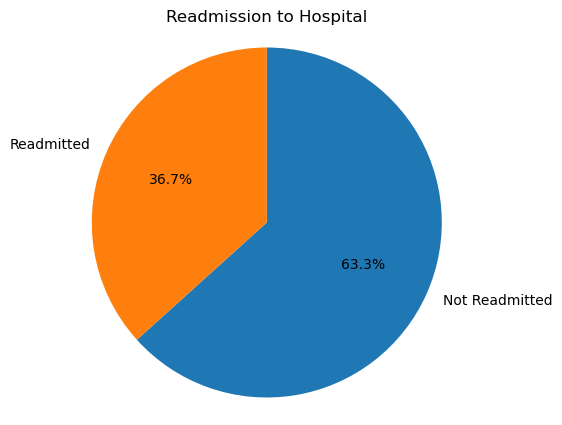

In [181]:
plt.figure(figsize = [16,5])
plt.title('Readmission to Hospital')
readmission_counts = variables_df.readmission.value_counts()
readmission_labels = ["Not Readmitted", "Readmitted"]
plt.pie(readmission_counts, labels=readmission_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

We can see that more than half of patients are not readmitted to hospital, while 36% are readmitted. 

Since the next set of plots are all going to the same code I am going to create a function to quickly create each of the charts. 

In [182]:
def quantitative_patient_data(variable_df, variable, suptitle, title_left, title_right, x_label, y_label):
    plt.figure(figsize=[16, 5])
    plt.suptitle(suptitle)

    # LEFT plot: Univariate exploration
    plt.subplot(1, 2, 1)
    plt.title(title_left)
    plt.hist(data=variable_df, x=variable, bins=10)
    plt.xlabel(f'{x_label} of Patient')
    plt.ylabel('Number of Patients')

    # RIGHT plot: Bivariate exploration 
    plt.subplot(1, 2, 2)
    plt.title(title_right)
    sb.violinplot(data = variables_df, x=variable, y="readmission", orient='h')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

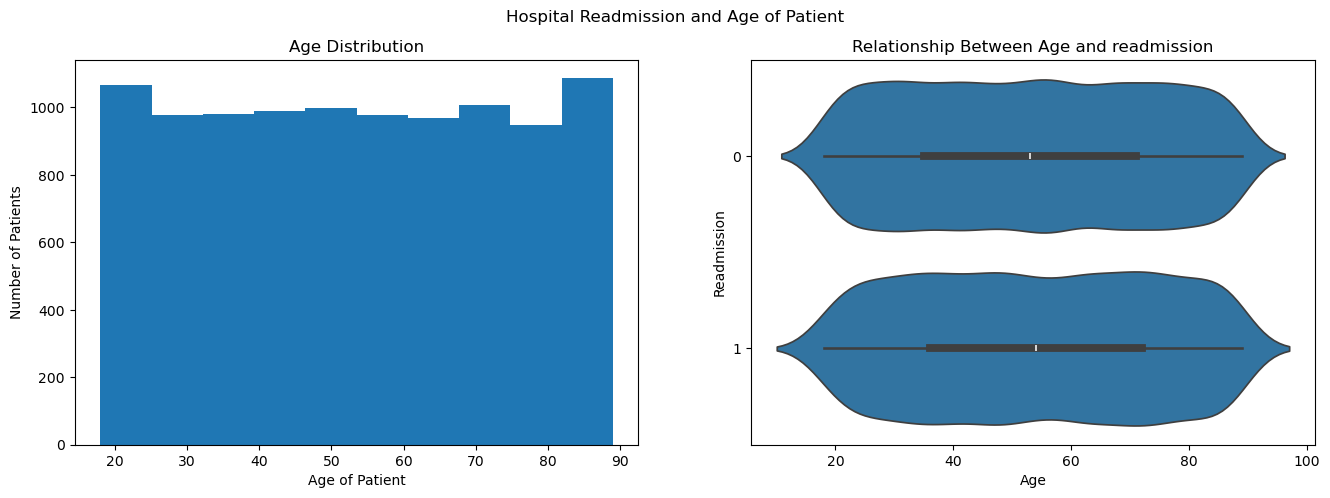

In [183]:
# The first variable is Age
quantitative_patient_data(
    variable_df=variables_df,
    variable='age',
    suptitle='Hospital Readmission and Age of Patient',
    title_left='Age Distribution',
    title_right='Relationship Between Age and readmission',
    x_label='Age',
    y_label='Readmission'
)

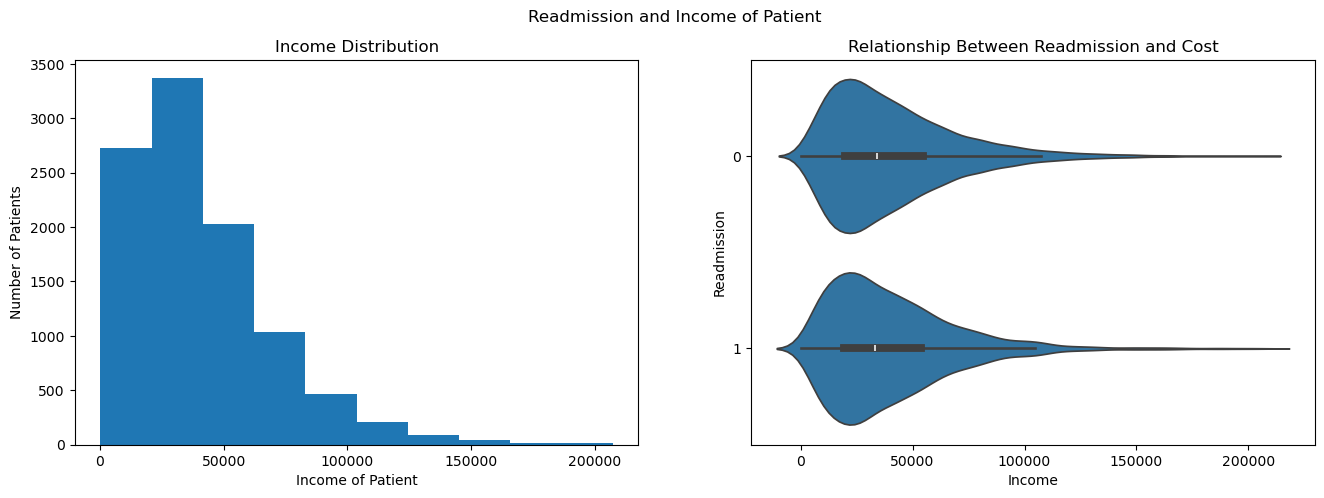

In [184]:
# Income
quantitative_patient_data(
    variable_df=variables_df,
    variable='income',
    suptitle='Readmission and Income of Patient',
    title_left='Income Distribution',
    title_right='Relationship Between Readmission and Cost',
    x_label='Income',
    y_label='Readmission'
)

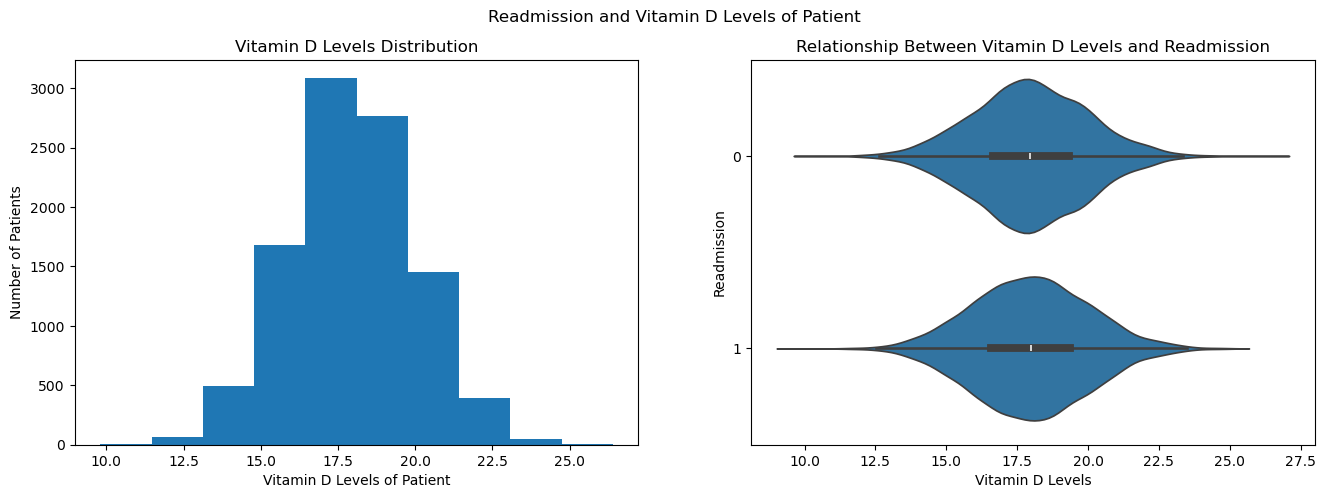

In [185]:
# Vitamin D Levels
quantitative_patient_data(
    variable_df=variables_df,
    variable='vit_d',
    suptitle='Readmission and Vitamin D Levels of Patient',
    title_left='Vitamin D Levels Distribution',
    title_right='Relationship Between Vitamin D Levels and Readmission',
    x_label='Vitamin D Levels',
    y_label='Readmission'
)

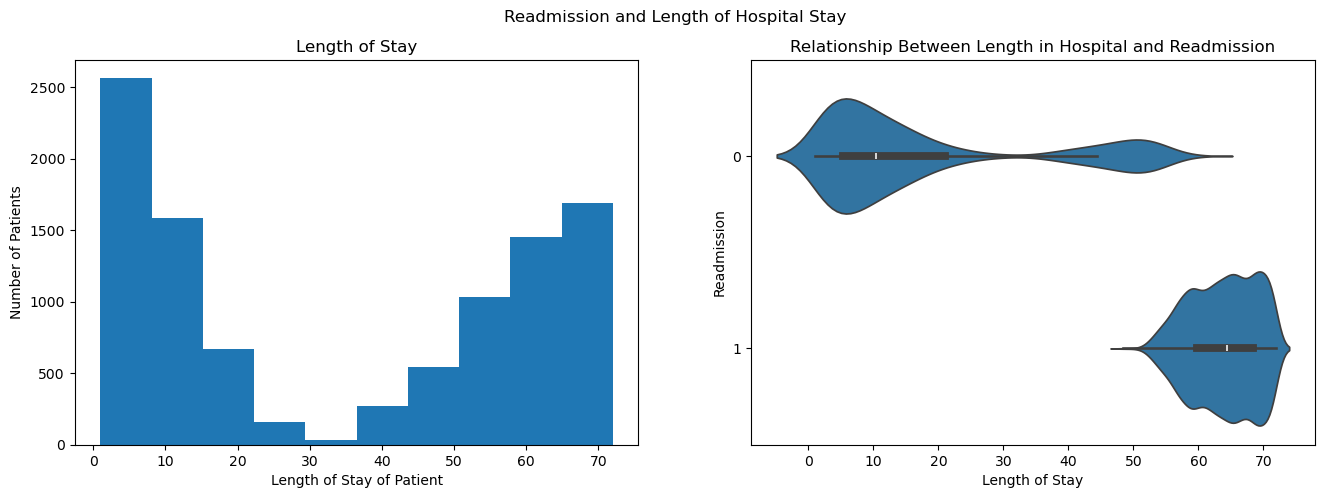

In [186]:
#Initial Days
quantitative_patient_data(
    variable_df=variables_df,
    variable='initial_days',
    suptitle='Readmission and Length of Hospital Stay',
    title_left='Length of Stay',
    title_right='Relationship Between Length in Hospital and Readmission',
    x_label='Length of Stay',
    y_label='Readmission'
)

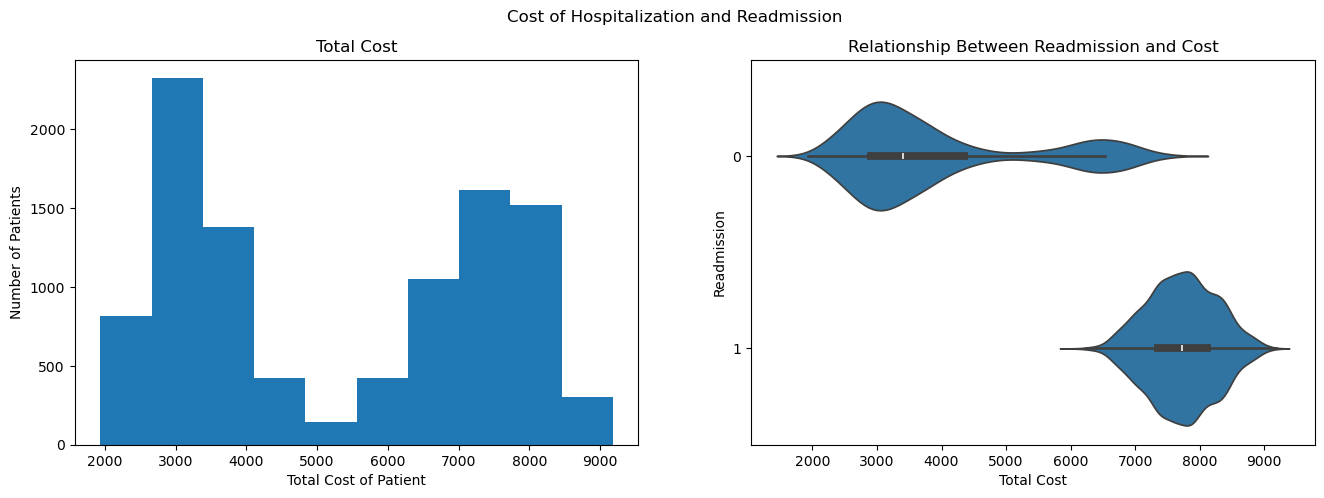

In [187]:
#Total Cost
quantitative_patient_data(
    variable_df=variables_df,
    variable='total_charge',
    suptitle='Cost of Hospitalization and Readmission',
    title_left='Total Cost',
    title_right='Relationship Between Readmission and Cost',
    x_label='Total Cost',
    y_label='Readmission'
)

In [188]:
# Creating a new function to create charts for the binary categorical variables. 
def qualitative_patient_data(variable_df, variable, suptitle, title_left, title_right, x_label, y_label):
    plt.figure(figsize=[16, 5])
    plt.suptitle(suptitle)

    # LEFT plot: Univariate exploration
    plt.subplot(1, 2, 1)
    plt.title(title_left)
    comp_risk_counts = variable_df[variable].value_counts()
    comp_risk_labels = [f'{variable}', f'no {variable}']
    plt.pie(comp_risk_counts, labels=comp_risk_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.axis('square')

    # RIGHT plot: Bivariate exploration
    plt.subplot(1, 2, 2)
    plt.title(title_right)
    sb.countplot(data = variable_df, x=variable, hue="readmission")
    plt.legend(["Not Readmitted", "Readmitted"])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    plt.show()

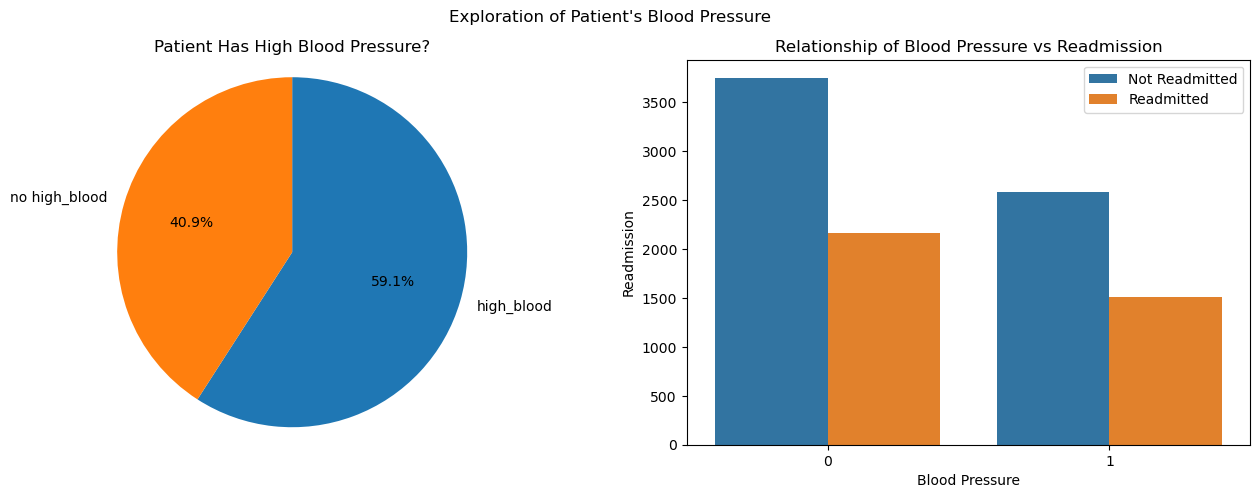

In [189]:
#High Blood Pressure
qualitative_patient_data(
    variable_df=variables_df,
    variable='high_blood',
    suptitle="Exploration of Patient's Blood Pressure",
    title_left="Patient Has High Blood Pressure?",
    title_right="Relationship of Blood Pressure vs Readmission",
    x_label="Blood Pressure",
    y_label="Readmission"
)

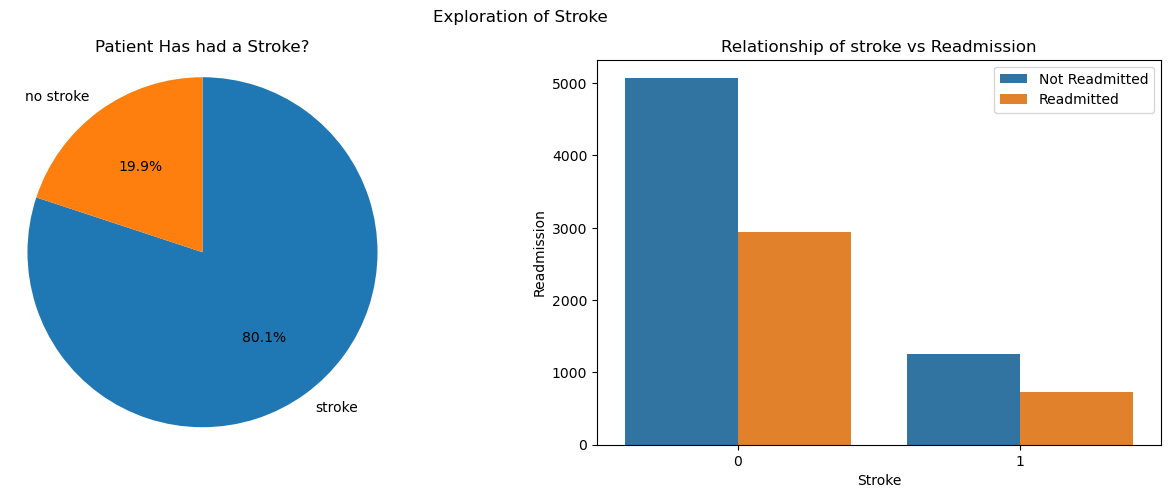

In [190]:
# Stroke
qualitative_patient_data(
    variable_df=variables_df,
    variable='stroke',
    suptitle="Exploration of Stroke",
    title_left="Patient Has had a Stroke?",
    title_right="Relationship of stroke vs Readmission",
    x_label="Stroke",
    y_label="Readmission"
)

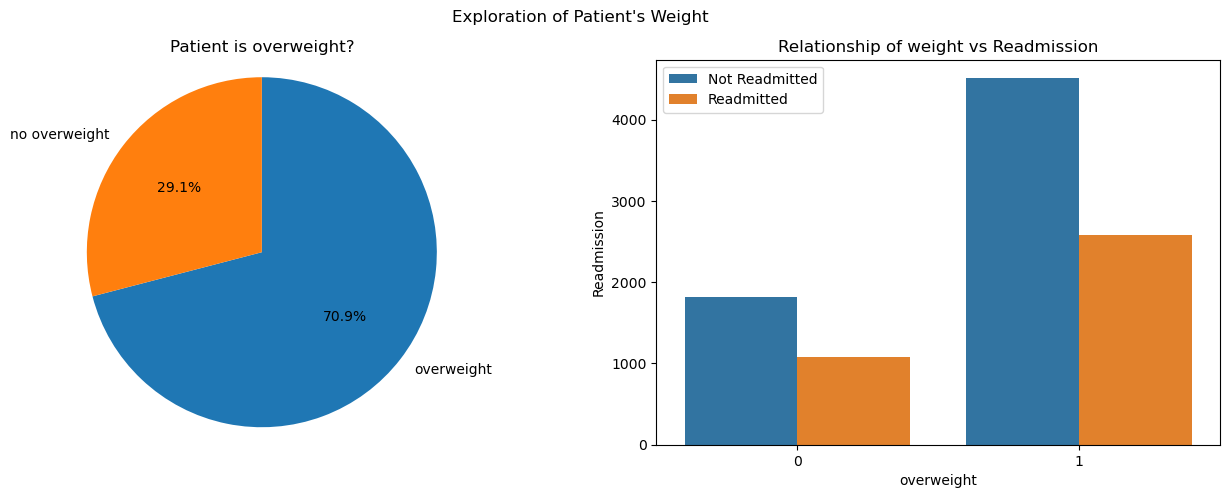

In [191]:
# Overweight
qualitative_patient_data(
    variable_df=variables_df,
    variable='overweight',
    suptitle="Exploration of Patient's Weight",
    title_left="Patient is overweight?",
    title_right="Relationship of weight vs Readmission",
    x_label="overweight",
    y_label="Readmission"
)

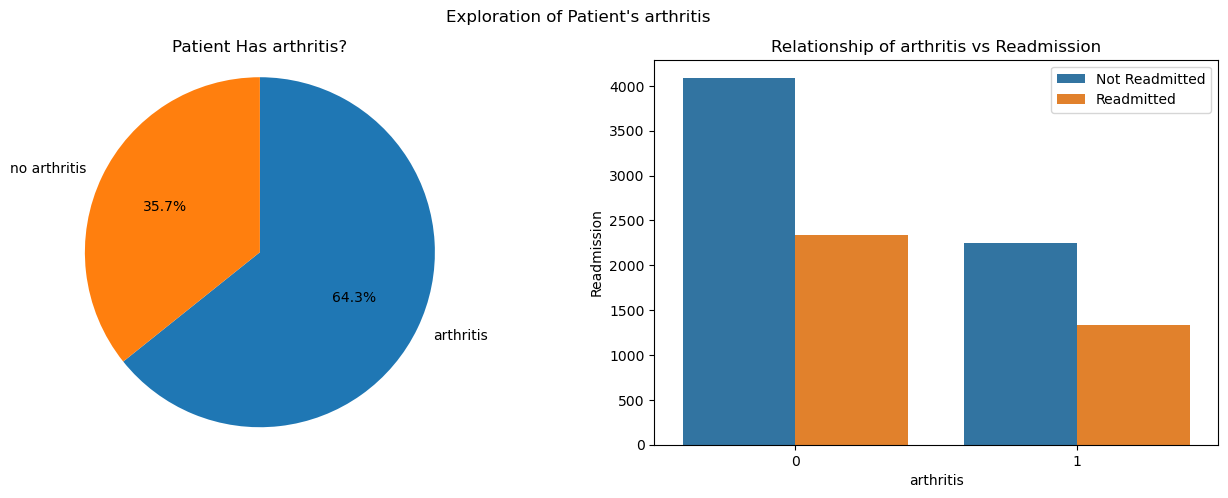

In [192]:
# Arthritis
qualitative_patient_data(
    variable_df=variables_df,
    variable='arthritis',
    suptitle="Exploration of Patient's arthritis",
    title_left="Patient Has arthritis?",
    title_right="Relationship of arthritis vs Readmission",
    x_label="arthritis",
    y_label="Readmission"
)

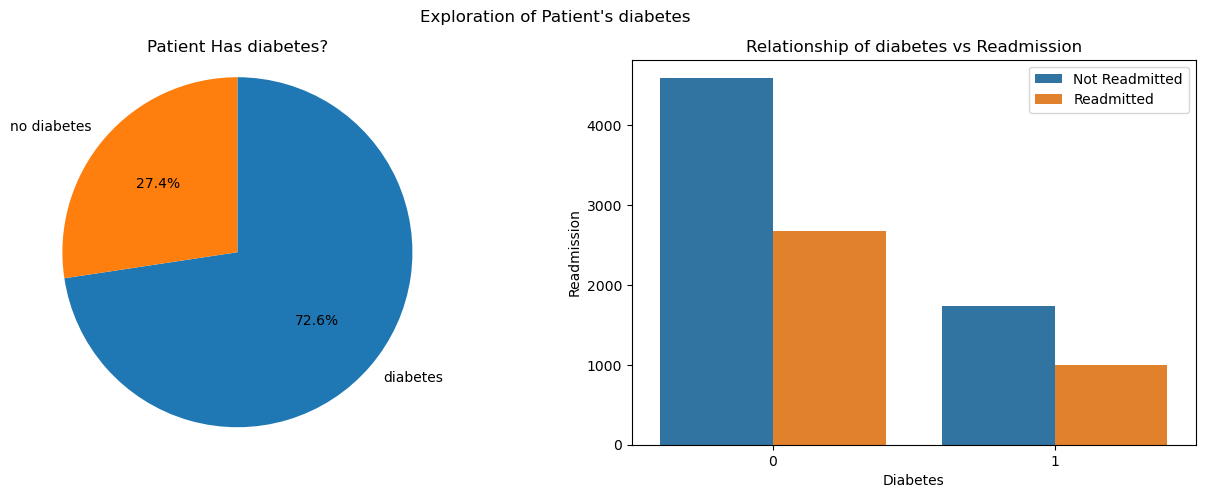

In [193]:
# Diabetes
qualitative_patient_data(
    variable_df=variables_df,
    variable='diabetes',
    suptitle="Exploration of Patient's diabetes",
    title_left="Patient Has diabetes?",
    title_right="Relationship of diabetes vs Readmission",
    x_label="Diabetes",
    y_label="Readmission"
)

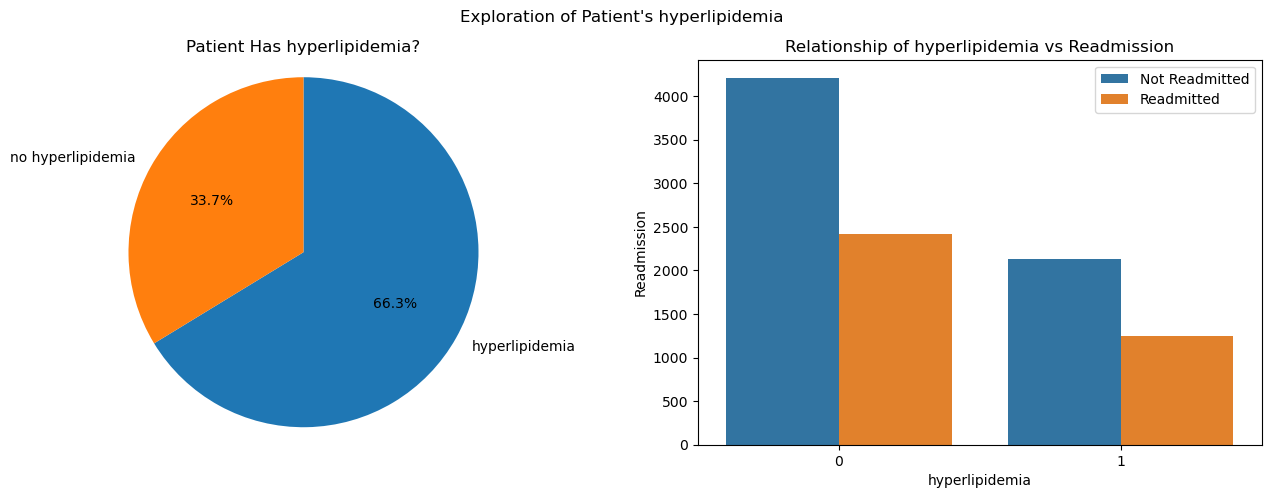

In [194]:
# Hyperlipidemia
qualitative_patient_data(
    variable_df=variables_df,
    variable='hyperlipidemia',
    suptitle="Exploration of Patient's hyperlipidemia",
    title_left="Patient Has hyperlipidemia?",
    title_right="Relationship of hyperlipidemia vs Readmission",
    x_label="hyperlipidemia",
    y_label="Readmission"
)

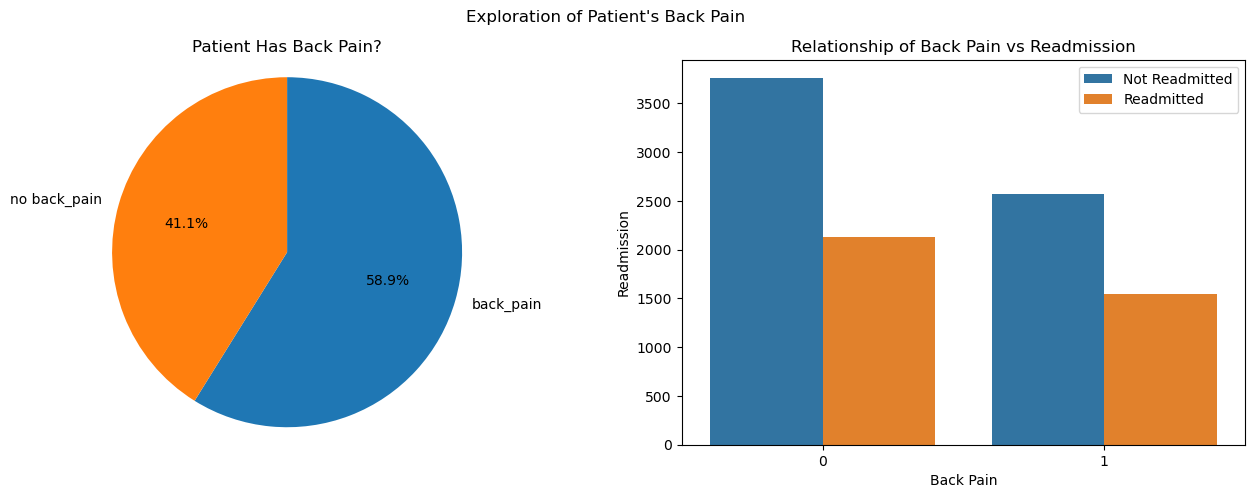

In [195]:
# Back Pain
qualitative_patient_data(
    variable_df=variables_df,
    variable='back_pain',
    suptitle="Exploration of Patient's Back Pain",
    title_left="Patient Has Back Pain?",
    title_right="Relationship of Back Pain vs Readmission",
    x_label="Back Pain",
    y_label="Readmission"
)

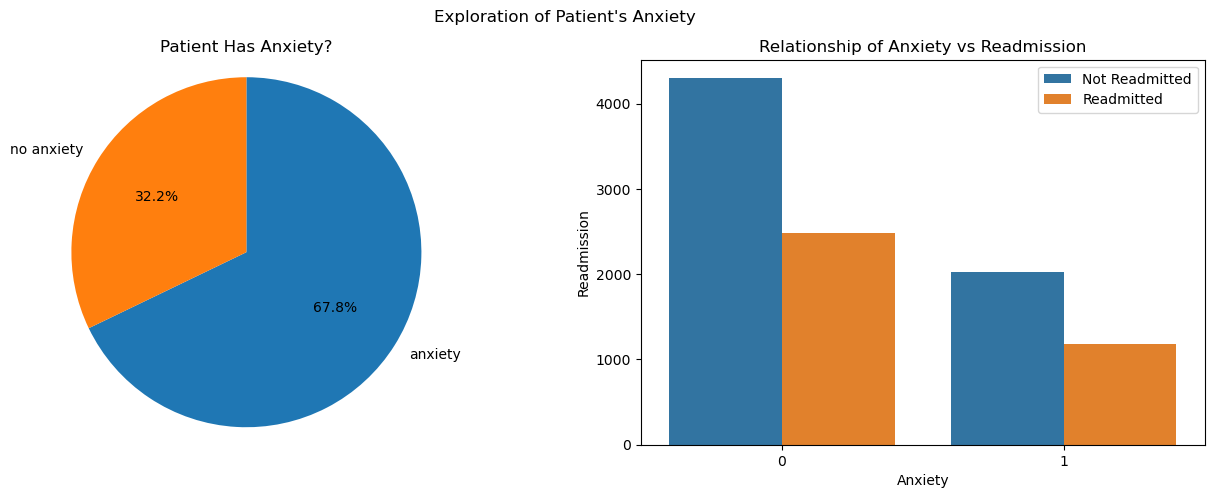

In [196]:
# Anxiety
qualitative_patient_data(
    variable_df=variables_df,
    variable='anxiety',
    suptitle="Exploration of Patient's Anxiety",
    title_left="Patient Has Anxiety?",
    title_right="Relationship of Anxiety vs Readmission",
    x_label="Anxiety",
    y_label="Readmission"
)

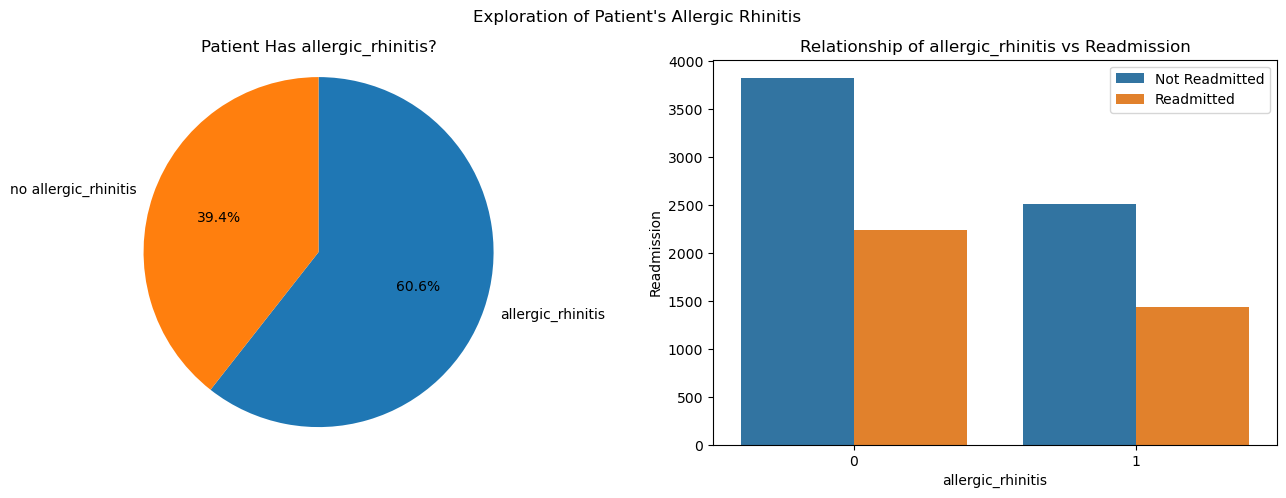

In [197]:
# Allergic Rhinitis
qualitative_patient_data(
    variable_df=variables_df,
    variable='allergic_rhinitis',
    suptitle="Exploration of Patient's Allergic Rhinitis",
    title_left="Patient Has allergic_rhinitis?",
    title_right="Relationship of allergic_rhinitis vs Readmission",
    x_label="allergic_rhinitis",
    y_label="Readmission"
)

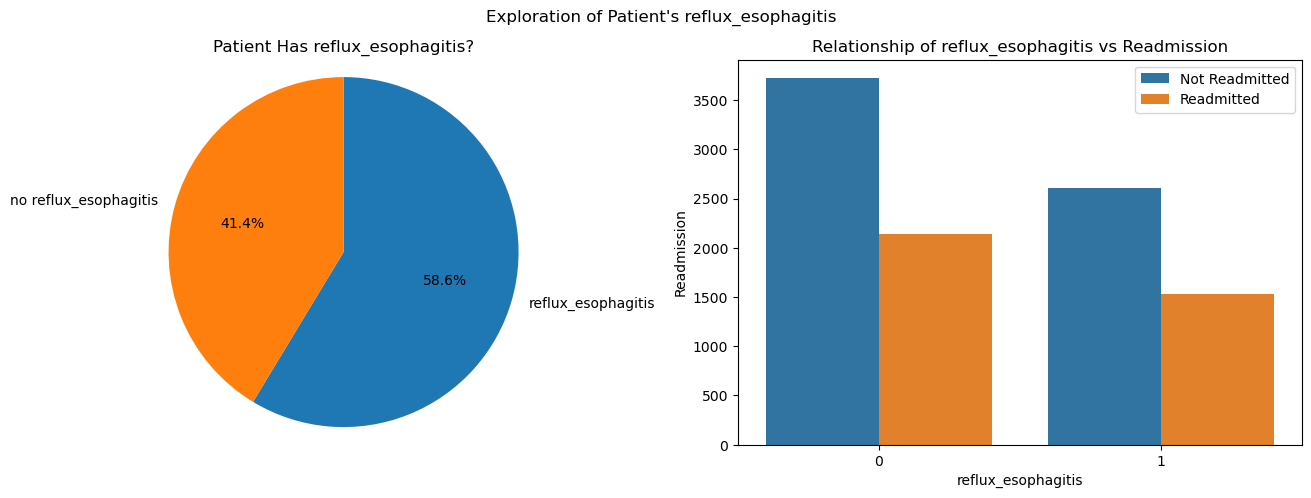

In [198]:
# Reflux Esophagitis
qualitative_patient_data(
    variable_df=variables_df,
    variable='reflux_esophagitis',
    suptitle="Exploration of Patient's reflux_esophagitis",
    title_left="Patient Has reflux_esophagitis?",
    title_right="Relationship of reflux_esophagitis vs Readmission",
    x_label="reflux_esophagitis",
    y_label="Readmission"
)

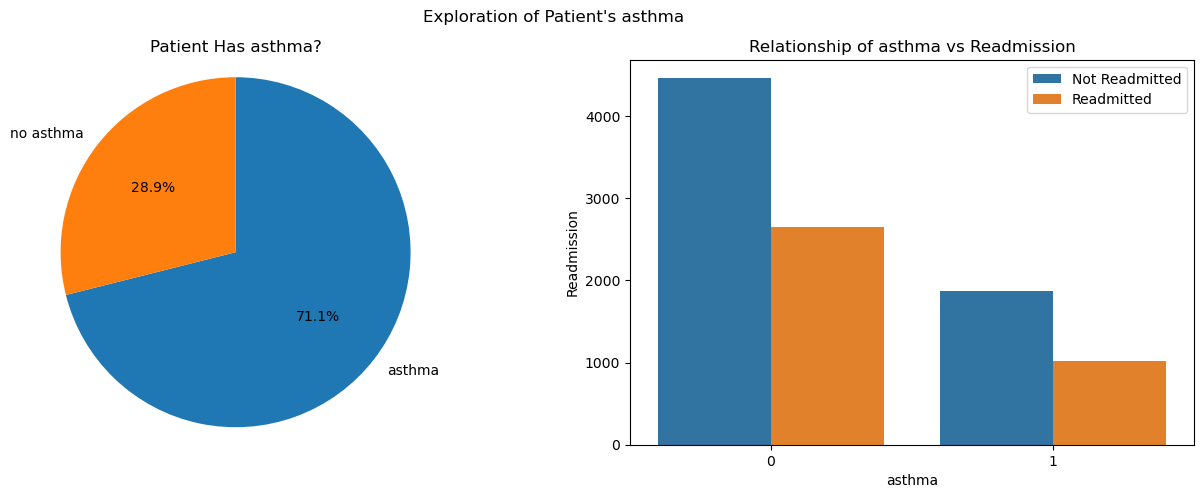

In [199]:
# Asthma
qualitative_patient_data(
    variable_df=variables_df,
    variable='asthma',
    suptitle="Exploration of Patient's asthma",
    title_left="Patient Has asthma?",
    title_right="Relationship of asthma vs Readmission",
    x_label="asthma",
    y_label="Readmission"
)

In [200]:
# Function for the rest of the categorical variables
def plot_categorical_variable(variable_df, variable, suptitle, title_left, title_right, x_label, y_label):
    plt.figure(figsize=[16, 5])
    plt.suptitle(suptitle)

    # LEFT plot: Univariate exploration
    plt.subplot(1, 2, 1)
    plt.title(title_left)
    sb.countplot(data=variable_df, x=variable)
    plt.xlabel(x_label)
    plt.ylabel('Number of Patients')

    # RIGHT plot: Bivariate exploration
    plt.subplot(1, 2, 2)
    plt.title(title_right)
    sb.countplot(data=variable_df, x=variable, hue = 'readmission')
    plt.legend(['Not Readmitted', 'Readmitted'])
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

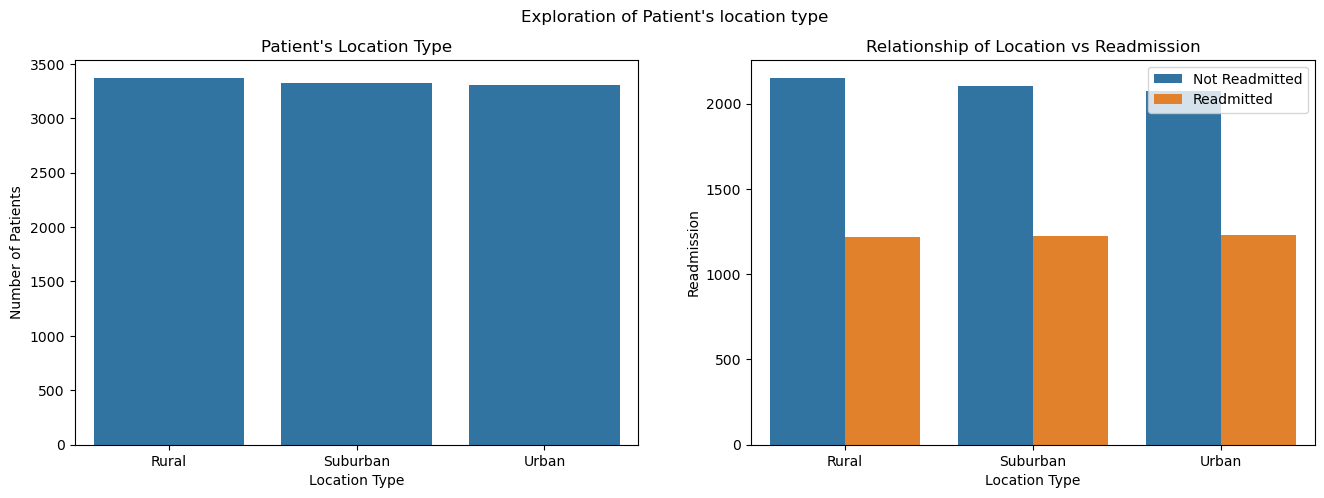

In [201]:
# Location Type
plot_categorical_variable(
    variable_df=variables_df,
    variable='area',
    suptitle="Exploration of Patient's location type",
    title_left="Patient's Location Type",
    title_right="Relationship of Location vs Readmission",
    x_label="Location Type",
    y_label="Readmission"
)

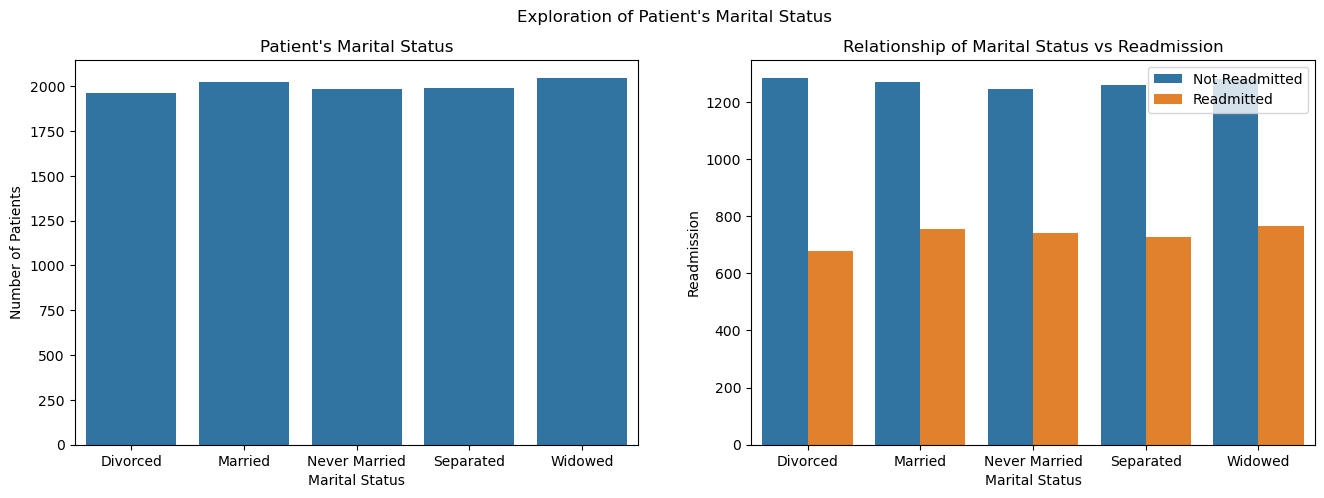

In [202]:
# Marital Status
plot_categorical_variable(
    variable_df=variables_df,
    variable='marital',
    suptitle="Exploration of Patient's Marital Status",
    title_left="Patient's Marital Status",
    title_right="Relationship of Marital Status vs Readmission",
    x_label="Marital Status",
    y_label="Readmission"
)

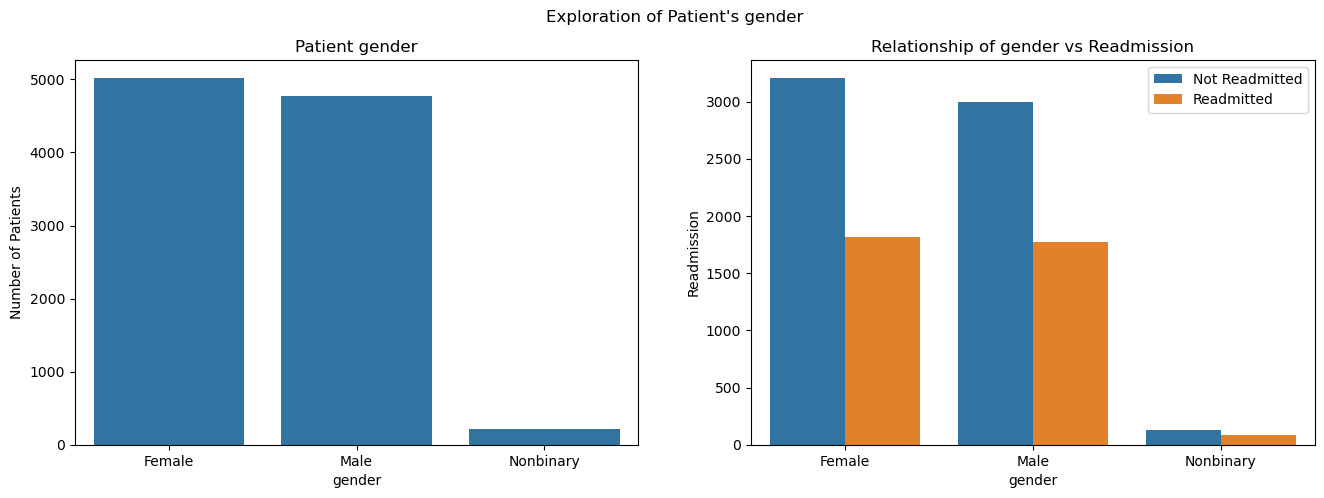

In [203]:
# Gender
plot_categorical_variable(
    variable_df=variables_df,
    variable='gender',
    suptitle="Exploration of Patient's gender",
    title_left="Patient gender",
    title_right="Relationship of gender vs Readmission",
    x_label="gender",
    y_label="Readmission"
)

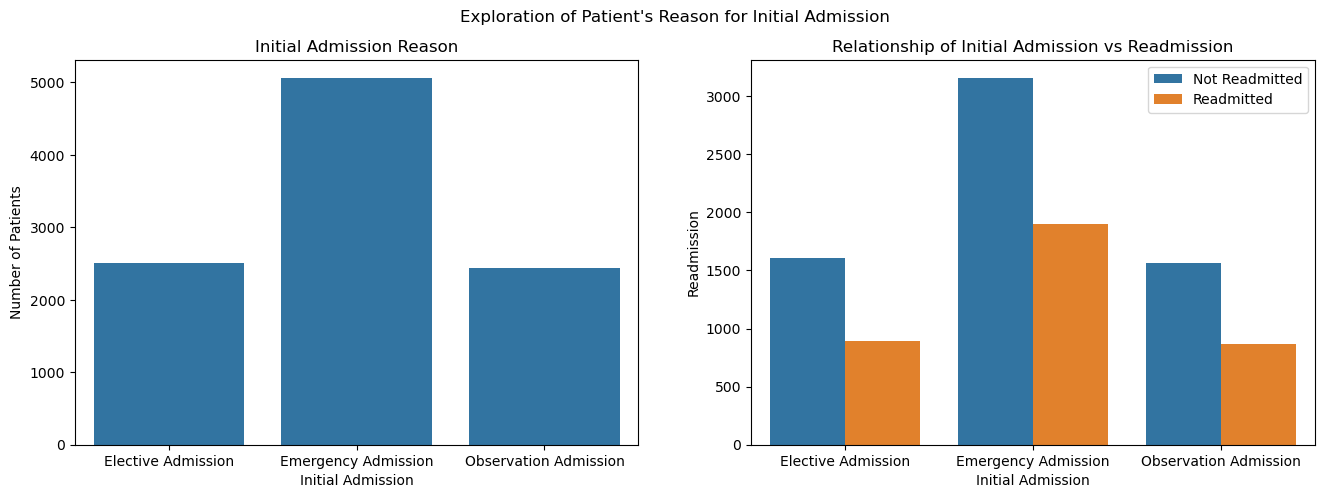

In [204]:
# Reason for Initial admission
plot_categorical_variable(
    variable_df=variables_df,
    variable='initial_admin',
    suptitle="Exploration of Patient's Reason for Initial Admission",
    title_left="Initial Admission Reason",
    title_right="Relationship of Initial Admission vs Readmission",
    x_label="Initial Admission",
    y_label="Readmission"
)

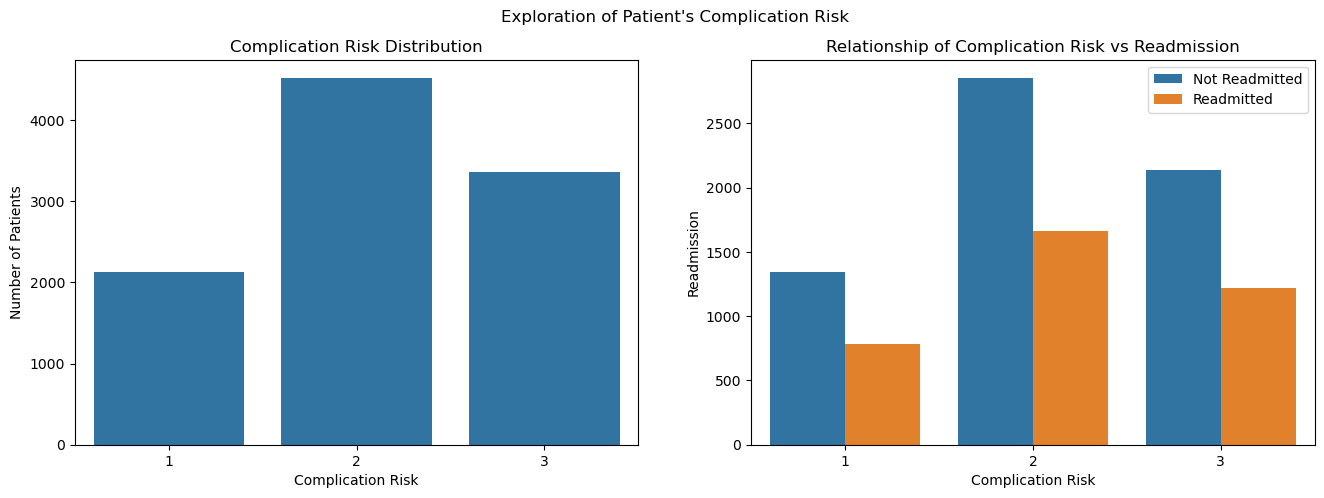

In [205]:
# Complication Risk
plot_categorical_variable(
    variable_df=variables_df,
    variable='complication_risk',
    suptitle="Exploration of Patient's Complication Risk",
    title_left="Complication Risk Distribution",
    title_right="Relationship of Complication Risk vs Readmission",
    x_label="Complication Risk",
    y_label="Readmission"
)

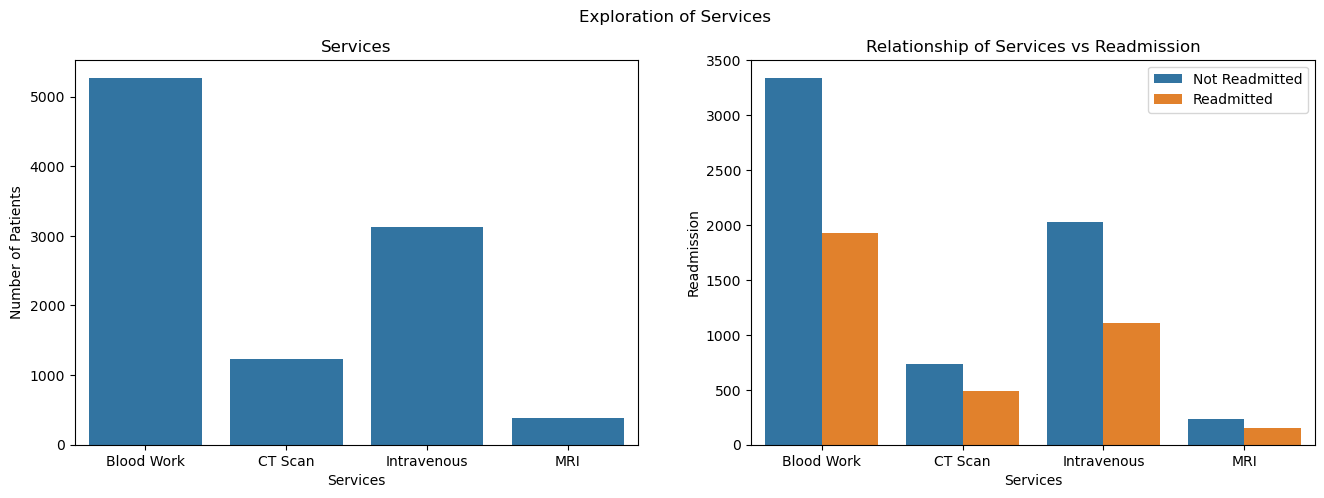

In [206]:
# Services used in Hospital
plot_categorical_variable(
    variable_df=variables_df,
    variable='services',
    suptitle="Exploration of Services",
    title_left="Services",
    title_right="Relationship of Services vs Readmission",
    x_label="Services",
    y_label="Readmission"
)

### C4. Data Transformation

In order to use the categorical variables in the regression model we have to transform the data to be numeric. To do this I will be using one hot encoding. This will create dummy columns filled with 1's and 0's to indicate the presence or absence of data for the patient. One Hot encoding always creates dummy variables that are 1 less than the values in the column. Therefore we will see 2 columns for the area column and a row with 0's in both will indicate that the area is the column that was dropped. 

In [207]:
#One Hot encoding for nominal categorical
categorical_columns = ['area', 'marital', 'gender', 'initial_admin', 'services']
logistic_regress = pd.get_dummies(variables_df, columns=categorical_columns, drop_first=True)

logistic_regress = logistic_regress.astype(int)

In [208]:
logistic_regress.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   age                                  10000 non-null  int32
 1   income                               10000 non-null  int32
 2   readmission                          10000 non-null  int32
 3   vit_d                                10000 non-null  int32
 4   high_blood                           10000 non-null  int32
 5   stroke                               10000 non-null  int32
 6   complication_risk                    10000 non-null  int32
 7   overweight                           10000 non-null  int32
 8   arthritis                            10000 non-null  int32
 9   diabetes                             10000 non-null  int32
 10  hyperlipidemia                       10000 non-null  int32
 11  back_pain                            10000 non-null  int32


In [209]:
# Clean up the names of the new columns
pythonic_columns = ['age', 'income', 'readmission', 'vit_d', 'high_blood', 'stroke', 'complication_risk','overweight', 'arthritis', 
                    'diabetes', 'hyperlipidemia', 'back_pain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 
                    'asthma', 'initial_days', 'total_charge','area_suburban', 'area_urban', 'marital_married', 
                    'marital_never', 'marital_seperate', 'marital_widow', 'gender_male', 'gender_nb', 
                    'initial_admin_emergency', 'initial_admin_observation','services_ct', 'services_iv', 
                    'services_mri']
logistic_regress = logistic_regress.set_axis(pythonic_columns, axis=1)
logistic_regress.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        10000 non-null  int32
 1   income                     10000 non-null  int32
 2   readmission                10000 non-null  int32
 3   vit_d                      10000 non-null  int32
 4   high_blood                 10000 non-null  int32
 5   stroke                     10000 non-null  int32
 6   complication_risk          10000 non-null  int32
 7   overweight                 10000 non-null  int32
 8   arthritis                  10000 non-null  int32
 9   diabetes                   10000 non-null  int32
 10  hyperlipidemia             10000 non-null  int32
 11  back_pain                  10000 non-null  int32
 12  anxiety                    10000 non-null  int32
 13  allergic_rhinitis          10000 non-null  int32
 14  reflux_esophagitis         

Another data manipulation technique I want to use for this data is normalizing the continious data. The continuous data using wildly different scales which can make modeling less accurate. Therefore I am going to use the StandardScaler package and standardize the variables.

In [210]:
# Isolate continuous variables
continuous_columns = ['age', 'income', 'vit_d', 'initial_days', 'total_charge']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
logistic_regress[continuous_columns] = scaler.fit_transform(logistic_regress[continuous_columns])

logistic_regress.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        10000 non-null  float64
 1   income                     10000 non-null  float64
 2   readmission                10000 non-null  int32  
 3   vit_d                      10000 non-null  float64
 4   high_blood                 10000 non-null  int32  
 5   stroke                     10000 non-null  int32  
 6   complication_risk          10000 non-null  int32  
 7   overweight                 10000 non-null  int32  
 8   arthritis                  10000 non-null  int32  
 9   diabetes                   10000 non-null  int32  
 10  hyperlipidemia             10000 non-null  int32  
 11  back_pain                  10000 non-null  int32  
 12  anxiety                    10000 non-null  int32  
 13  allergic_rhinitis          10000 non-null  int32  


### C5. Prepared dataset

In [211]:
# Save dataframe to CSV
logistic_regress.to_csv('d209_task_2.csv', index=False)

## Part 4. Model Comparison and Analysis
### D1. Initial Model

My initial model for the data will use all the variables that I explored above. Which I will then reduce to create an even better model. 

The code for this model was created with help from the D208 Datacamp courses.

In [212]:
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income', 'vit_d', 'high_blood', 'stroke', 'complication_risk', 'overweight','arthritis','diabetes',
                'hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis','asthma','initial_days',
                'total_charge','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                'marital_widow','gender_male','gender_nb','initial_admin_emergency','initial_admin_observation','services_ct',
                'services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.034968
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9969
Method:                           MLE   Df Model:                           30
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.9468
Time:                        14:21:26   Log-Likelihood:                -349.68
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                           0.0426      0.099      0.428      0.668      -0

### D2. Model Reduction and Justification

While the model runs, which means it is able to find a solution, there are several issues. The first of which is the note at the end about possible complete quasi-seperation. Quasi-seperation is when there is perfect or near-perfect association between the independent variables. Or for certain values of independent variables the dependent variable is perfectly predictable which leads to issues in coefficient estimation in the model. [Complete or Quasi complete seperation in Logistic Modeling](https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/)

My suspicion is that the variables total_charge and initial_days are whats causing the quasi-seperation issue. When running the bivariate charts for the independent variables we saw that these two variables had very little overlap between readmission and not readmission. 

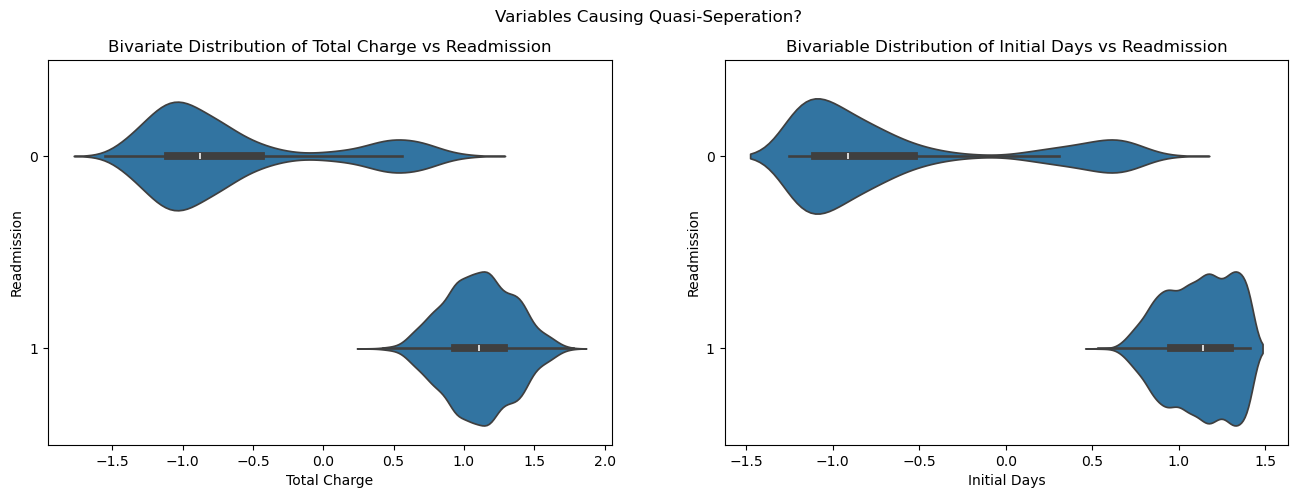

In [213]:
plt.figure(figsize=[16, 5])
plt.suptitle('Variables Causing Quasi-Seperation?')

# LEFT plot: total_charge
plt.subplot(1, 2, 1)
plt.title('Bivariate Distribution of Total Charge vs Readmission')
sb.violinplot(data = logistic_regress, x='total_charge', y="readmission", orient='h')
plt.xlabel('Total Charge')
plt.ylabel('Readmission')

# RIGHT plot: initial_days
plt.subplot(1, 2, 2)
plt.title('Bivariable Distribution of Initial Days vs Readmission')
sb.violinplot(data = logistic_regress, x='initial_days', y="readmission", orient='h')
plt.xlabel('Initial Days')
plt.ylabel('Readmission')

plt.show()

If the variables total_charge and initial_days are causing quasi-separation, it means that there might be specific values or combinations of these variables that perfectly predict the readmission outcome. This can lead to challenges in estimating the coefficients of the logistic regression model and result in infinite parameter estimates. To check if these variables are causing the issue I am going to run the model again having removed one and then both.

In [214]:
# Remove total_charge to check for quasi-seperation warning
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income', 'vit_d', 'high_blood', 'stroke', 'complication_risk', 'overweight','arthritis','diabetes',
                'hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis','asthma','initial_days',
                'area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                'marital_widow','gender_male','gender_nb','initial_admin_emergency','initial_admin_observation','services_ct',
                'services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.035018
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9970
Method:                           MLE   Df Model:                           29
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.9467
Time:                        14:21:26   Log-Likelihood:                -350.18
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                           0.0362      0.099      0.366      0.715      -0

In [215]:
# Remove initial_days to check for quasi seperation
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income', 'vit_d', 'high_blood', 'stroke', 'complication_risk', 'overweight','arthritis','diabetes',
                'hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis','asthma',
                'total_charge','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                'marital_widow','gender_male','gender_nb','initial_admin_emergency','initial_admin_observation','services_ct',
                'services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.049849
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9970
Method:                           MLE   Df Model:                           29
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.9242
Time:                        14:21:26   Log-Likelihood:                -498.49
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                          -0.0080      0.083     -0.097      0.923      -0

In [216]:
# Remove both total_charge and initial_days to check for quasi-seperation
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income', 'vit_d', 'high_blood', 'stroke', 'complication_risk', 'overweight',
                      'arthritis','diabetes','hyperlipidemia','back_pain','anxiety','allergic_rhinitis',
                      'reflux_esophagitis','asthma','area_suburban','area_urban','marital_married','marital_never',
                      'marital_seperate','marital_widow','gender_male','gender_nb','initial_admin_emergency',
                      'initial_admin_observation','services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655736
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9971
Method:                           MLE   Df Model:                           28
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002357
Time:                        14:21:26   Log-Likelihood:                -6557.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.3180
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                           0.0327      0.021      1.569      0.117      -0.

As I suspected the total_charge and initial_days were causing the quasi-separation issues. There are several methods that can be used to mitigate separation issues in the model however for this project I have decided to leave total charge and initial days out of the model. 

The next step for reducing the model is to check for mutlicollinearity within the independent variables, that is when independent variables effect each other just as much as the dependent variable.

The first thing I want to do to check for multicollinearity is to use variance inflation factor (VIF). This method will check which variables might be connected. A VIF number higher than 10 shows that the variable is causing multicollinearity. The code I am using for this was created with help from the D208 webinar slideshows.

In [217]:
# check for VIF to see if variables should be eliminated due to high multicolinearity
X = logistic_regress[['age', 'income', 'vit_d', 'high_blood', 'stroke', 'complication_risk', 'overweight',
                      'arthritis','diabetes','hyperlipidemia','back_pain','anxiety','allergic_rhinitis',
                      'reflux_esophagitis','asthma','area_suburban','area_urban','marital_married','marital_never',
                      'marital_seperate','marital_widow','gender_male','gender_nb','initial_admin_emergency',
                      'initial_admin_observation','services_ct','services_iv','services_mri']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                      feature       VIF
0                         age  1.003262
1                      income  1.002523
2                       vit_d  1.004115
3                  high_blood  1.669082
4                      stroke  1.236912
5           complication_risk  6.566272
6                  overweight  3.165762
7                   arthritis  1.533087
8                    diabetes  1.359980
9              hyperlipidemia  1.487274
10                  back_pain  1.664947
11                    anxiety  1.454104
12          allergic_rhinitis  1.612537
13         reflux_esophagitis  1.664671
14                     asthma  1.390382
15              area_suburban  1.887519
16                 area_urban  1.891558
17            marital_married  1.870959
18              marital_never  1.838639
19           marital_seperate  1.824742
20              marital_widow  1.868886
21                gender_male  1.877866
22                  gender_nb  1.043231
23    initial_admin_emergency  2.726326


In [218]:
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income', 'vit_d', 'high_blood', 'stroke', 'complication_risk', 'overweight','arthritis',
                      'diabetes','hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis',
                      'asthma','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                      'marital_widow','gender_male','gender_nb','initial_admin_emergency','initial_admin_observation',
                      'services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655736
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9971
Method:                           MLE   Df Model:                           28
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002357
Time:                        14:21:27   Log-Likelihood:                -6557.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.3180
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                           0.0327      0.021      1.569      0.117      -0.

My next step for reducing my model will be to use backwards stepwise elimination. This process involves running the model and removing variables that are over the 0.05 p-value for statistical significance. This process is iterative and so I will be repeating until all variables are below the 0.05 p-value.

In [219]:
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income', 'high_blood', 'stroke', 'complication_risk', 'overweight','arthritis',
                      'diabetes','hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis',
                      'asthma','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                      'marital_widow','gender_male','gender_nb','initial_admin_emergency','initial_admin_observation',
                      'services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655738
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9972
Method:                           MLE   Df Model:                           27
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002354
Time:                        14:21:27   Log-Likelihood:                -6557.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.2734
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                           0.0327      0.021      1.570      0.116      -0.

In [220]:
# Backwards Elimination: Removed highest p-value, initial_admin_observation with 1.000
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income', 'high_blood', 'stroke', 'complication_risk', 'overweight','arthritis',
                      'diabetes','hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis',
                      'asthma','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                      'marital_widow','gender_male','gender_nb','initial_admin_emergency',
                      'services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655738
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9973
Method:                           MLE   Df Model:                           26
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002354
Time:                        14:21:27   Log-Likelihood:                -6557.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.2303
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0327      0.021      1.571      0.116      -0.008   

In [221]:
# Backwards Elimination: Removed highest p-value, stroke with .924
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income', 'high_blood', 'complication_risk', 'overweight','arthritis',
                      'diabetes','hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis',
                      'asthma','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                      'marital_widow','gender_male','gender_nb','initial_admin_emergency',
                      'services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655738
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9974
Method:                           MLE   Df Model:                           25
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002353
Time:                        14:21:27   Log-Likelihood:                -6557.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.1912
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0327      0.021      1.572      0.116      -0.008   

In [222]:
# Backwards Elimination: Removed highest p-value, high_blood with .830
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income', 'complication_risk', 'overweight','arthritis',
                      'diabetes','hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis',
                      'asthma','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                      'marital_widow','gender_male','gender_nb','initial_admin_emergency',
                      'services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655741
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9975
Method:                           MLE   Df Model:                           24
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002350
Time:                        14:21:27   Log-Likelihood:                -6557.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.1570
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0328      0.021      1.573      0.116      -0.008   

In [223]:
# Backwards Elimination: Removed highest p-value, anxiety with .813
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income', 'complication_risk', 'overweight','arthritis',
                      'diabetes','hyperlipidemia','back_pain','allergic_rhinitis','reflux_esophagitis',
                      'asthma','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                      'marital_widow','gender_male','gender_nb','initial_admin_emergency',
                      'services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655743
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9976
Method:                           MLE   Df Model:                           23
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002346
Time:                        14:21:27   Log-Likelihood:                -6557.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.1269
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0328      0.021      1.575      0.115      -0.008   

In [224]:
# Backwards Elimination: Removed highest p-value, diabetes with .788
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income', 'complication_risk', 'overweight','arthritis',
                      'hyperlipidemia','back_pain','allergic_rhinitis','reflux_esophagitis',
                      'asthma','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                      'marital_widow','gender_male','gender_nb','initial_admin_emergency',
                      'services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655747
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9977
Method:                           MLE   Df Model:                           22
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002340
Time:                        14:21:27   Log-Likelihood:                -6557.5
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.1011
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0328      0.021      1.574      0.116      -0.008   

In [225]:
# Backwards Elimination: Removed highest p-value, complication_risk with .718
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income','overweight','arthritis',
                      'hyperlipidemia','back_pain','allergic_rhinitis','reflux_esophagitis',
                      'asthma','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                      'marital_widow','gender_male','gender_nb','initial_admin_emergency',
                      'services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655754
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9978
Method:                           MLE   Df Model:                           21
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002330
Time:                        14:21:27   Log-Likelihood:                -6557.5
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.08001
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0327      0.021      1.573      0.116      -0.008   

In [226]:
# Backwards Elimination: Removed highest p-value, hyperlipidemia with .757
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income','overweight','arthritis',
                      'back_pain','allergic_rhinitis','reflux_esophagitis',
                      'asthma','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                      'marital_widow','gender_male','gender_nb','initial_admin_emergency',
                      'services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655758
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002323
Time:                        14:21:27   Log-Likelihood:                -6557.6
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.06163
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0328      0.021      1.574      0.115      -0.008   

In [227]:
# Backwards Elimination: Removed highest p-value, area_suburban with .654
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income','overweight','arthritis',
                      'back_pain','allergic_rhinitis','reflux_esophagitis',
                      'asthma','area_urban','marital_married','marital_never','marital_seperate',
                      'marital_widow','gender_male','gender_nb','initial_admin_emergency',
                      'services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655768
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002308
Time:                        14:21:27   Log-Likelihood:                -6557.7
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.04769
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0329      0.021      1.580      0.114      -0.008   

In [228]:
# Backwards Elimination: Removed highest p-value, allergic_rhinitis with .619
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income','overweight','arthritis',
                      'back_pain','reflux_esophagitis',
                      'asthma','area_urban','marital_married','marital_never','marital_seperate',
                      'marital_widow','gender_male','gender_nb','initial_admin_emergency',
                      'services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655781
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002289
Time:                        14:21:27   Log-Likelihood:                -6557.8
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.03660
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0328      0.021      1.574      0.115      -0.008   

In [229]:
# Backwards Elimination: Removed highest p-value, reflux_esophagitis with .616
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income','overweight','arthritis','back_pain','asthma','area_urban','marital_married','marital_never','marital_seperate','marital_widow','gender_male','gender_nb','initial_admin_emergency','services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655793
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002270
Time:                        14:21:27   Log-Likelihood:                -6557.9
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.02755
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0326      0.021      1.565      0.118      -0.008   

In [230]:
# Backwards Elimination: Removed highest p-value, arthritis with .487
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income','overweight','back_pain','asthma','area_urban','marital_married','marital_never','marital_seperate','marital_widow','gender_male','gender_nb','initial_admin_emergency','services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655817
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002233
Time:                        14:21:27   Log-Likelihood:                -6558.2
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.02166
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0327      0.021      1.570      0.116      -0.008   

In [231]:
# Backwards Elimination: Removed highest p-value, area_urban with .454
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income','overweight','back_pain','asthma','marital_married','marital_never','marital_seperate','marital_widow','gender_male','gender_nb','initial_admin_emergency','services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655846
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002190
Time:                        14:21:27   Log-Likelihood:                -6558.5
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.01710
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0324      0.021      1.558      0.119      -0.008   

In [232]:
# Backwards Elimination: Removed highest p-value, gender_nb with .400
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income','overweight','back_pain','asthma','marital_married','marital_never','marital_seperate','marital_widow','gender_male','initial_admin_emergency','services_ct','services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655881
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002137
Time:                        14:21:28   Log-Likelihood:                -6558.8
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.01384
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0324      0.021      1.559      0.119      -0.008   

In [233]:
# Backwards Elimination: Removed highest p-value, services_mri with .398
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income','overweight','back_pain','asthma','marital_married','marital_never','marital_seperate','marital_widow','gender_male','initial_admin_emergency','services_ct','services_iv']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655916
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002083
Time:                        14:21:28   Log-Likelihood:                -6559.2
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.01103
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0326      0.021      1.568      0.117      -0.008   

In [234]:
# Backwards Elimination: Removed highest p-value, overweight with .384
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income','back_pain','asthma','marital_married','marital_never','marital_seperate','marital_widow','gender_male','initial_admin_emergency','services_ct','services_iv']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655954
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.002025
Time:                        14:21:28   Log-Likelihood:                -6559.5
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.008752
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0328      0.021      1.576      0.115      -0.008   

In [235]:
# Backwards Elimination: Removed highest p-value, income with .298
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age','back_pain','asthma','marital_married','marital_never','marital_seperate','marital_widow','gender_male','initial_admin_emergency','services_ct','services_iv']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.656008
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.001942
Time:                        14:21:28   Log-Likelihood:                -6560.1
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.007606
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0330      0.021      1.589      0.112      -0.008   

In [236]:
# Backwards Elimination: Removed highest p-value, gender_male with .296
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age','back_pain','asthma','marital_married','marital_never','marital_seperate','marital_widow','initial_admin_emergency','services_ct','services_iv']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.656063
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.001859
Time:                        14:21:28   Log-Likelihood:                -6560.6
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.006508
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0327      0.021      1.572      0.116      -0.008   

In [237]:
# Backwards Elimination: Removed highest p-value, back_pain with .204
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age','asthma','marital_married','marital_never','marital_seperate','marital_widow','initial_admin_emergency','services_ct','services_iv']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.656144
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.001737
Time:                        14:21:28   Log-Likelihood:                -6561.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.006589
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0332      0.021      1.598      0.110      -0.008   

In [238]:
# Backwards Elimination: Removed highest p-value, marital_seperate with .175
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age','asthma','marital_married','marital_never','marital_widow','initial_admin_emergency','services_ct','services_iv']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.656236
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.001596
Time:                        14:21:28   Log-Likelihood:                -6562.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.007185
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0332      0.021      1.595      0.111      -0.008   

In [239]:
# Backwards Elimination: Removed highest p-value, marital_married with .201
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age','asthma','marital_never','marital_widow','initial_admin_emergency','services_ct','services_iv']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.656317
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.001472
Time:                        14:21:28   Log-Likelihood:                -6563.2
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.007148
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0334      0.021      1.608      0.108      -0.007   

In [240]:
# Backwards Elimination: Removed highest p-value, marital_never with .310
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age','asthma','marital_widow','initial_admin_emergency','services_ct','services_iv']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.656369
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.001394
Time:                        14:21:28   Log-Likelihood:                -6563.7
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.005463
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0330      0.021      1.590      0.112      -0.008   

In [241]:
# Backwards Elimination: Removed highest p-value, marital_widow with .356
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age','asthma','initial_admin_emergency','services_ct','services_iv']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.656411
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.001330
Time:                        14:21:28   Log-Likelihood:                -6564.1
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.003676
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0331      0.021      1.595      0.111      -0.008   

In [242]:
# Backwards Elimination: Removed highest p-value, services_iv with .136
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age','asthma','initial_admin_emergency','services_ct']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.656523
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                0.001160
Time:                        14:21:28   Log-Likelihood:                -6565.2
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.004216
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0329      0.021      1.584      0.113      -0.008   

At this point in the reduction I have run into the issue that only one of my variables would remain in the model if I continue with the 0.05 threshold for the p-value. While 0.05 is ideal for statistical significance and raising the threshold will affect my interpretation of the model I have decided that I will raise the p-value threshold to .10 in order to maintain more than one variable for the model. The implications of this choice will be discussed later in this project.

In [243]:
# Backwards Elimination: Removed highest p-value, age with .113
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['asthma','initial_admin_emergency','services_ct']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.656648
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:               0.0009688
Time:                        14:21:28   Log-Likelihood:                -6566.5
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.005245
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
asthma                     -0.0799      0.046     -1.736      0.082      -0.170   

### D3. Reduced Model

In [244]:
# Final Reduced Model
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['asthma','initial_admin_emergency','services_ct']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.656648
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:               0.0009688
Time:                        14:21:28   Log-Likelihood:                -6566.5
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.005245
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
asthma                     -0.0799      0.046     -1.736      0.082      -0.170   

### E1. Model Comparison

In [245]:
# Initial Model

# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['age', 'income', 'vit_d', 'high_blood', 'stroke', 'complication_risk', 'overweight','arthritis','diabetes',
                'hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis','asthma','initial_days',
                'total_charge','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                'marital_widow','gender_male','gender_nb','initial_admin_emergency','initial_admin_observation','services_ct',
                'services_iv','services_mri']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.034968
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9969
Method:                           MLE   Df Model:                           30
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.9468
Time:                        14:21:28   Log-Likelihood:                -349.68
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                           0.0426      0.099      0.428      0.668      -0

This initial model uses the "kitchen sink" approach, utilizing 30 independent variables which may or may not have any importance to the dependent variable. While the pseudo R-squared value is 0.95, which indicates a high degree of explanatory power in the model, many of the other metrics reveal some problems with the model. The log-likelihood is -331.67 which is far from zero where we would like to see this value. Additionally the LLR p-value is 0.00 which is too perfect to be good. 

The biggest red flag with this initial model is the warning of quasi-seperation, this warning suggests that some of the variables might not be well-identified due to a high degree of predictability. Together with the high Pseudo R-squared value this suggests that the model may be overfitting the data. 

In [246]:
# Final Reduced Model
# set dependent variable
y = logistic_regress.readmission
# set independent variables
X = logistic_regress[['asthma','initial_admin_emergency','services_ct']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.656648
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:               0.0009688
Time:                        14:21:28   Log-Likelihood:                -6566.5
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.005245
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
asthma                     -0.0799      0.046     -1.736      0.082      -0.170   

This reduced model is not perfect but it is an improvement from the initial model. The quasi-seperation warning is no longer an issue. Additionally the LLR p-value is no longer perfect which suggests we have solved the over fitting issue. It is now 0.0052 which is statistically significant. However in this reduced model the Psuedo R-squared is very low which indicates that the model has little explanatory power. 

Comparing these models we can see that the reduced model solves for overfitting which was the biggest concern of the initial model. However the reduced model fixed the overfitting at the expense of being accurate. Comparing the Psuedo R-Squareds the initial model was .95 while the reduced model is .00097. A higher Psuedo R-squared is associated with a better model prediction however with the quasi-seperation in the initial model the better prediction was likely overfitting. [Pseudo R-Squared](https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-what-are-pseudo-r-squareds/) Similarly the LLR p-value, which works much the same as other p-values from statistics is technically better in the initial model with 0.00 but that perfect fit is a sign of overfitting, while the LLR p-value of the reduced model is 0.0052 which is still statistically significant. 

### E2. Logistic Regression

Accuracy of logistic regression classifier on test set: 0.65
Confusion Matrix:
[[1291    0]
 [ 709    0]]

Explanation:
True Positives (TP): 0
True Negatives (TN): 1291
False Positives (FP): 0
False Negatives (FN): 709


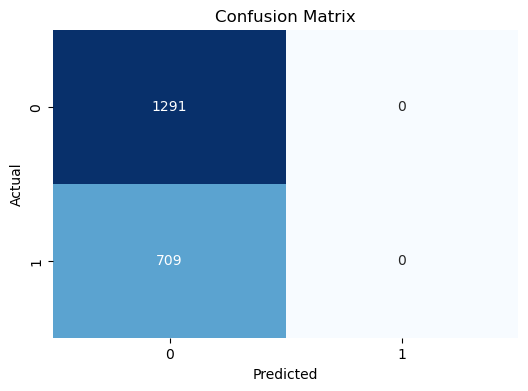

In [247]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Display explanations in the code output
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print("Confusion Matrix:")
print(conf_matrix)
print("\nExplanation:")
print("True Positives (TP):", conf_matrix[1, 1])
print("True Negatives (TN):", conf_matrix[0, 0])
print("False Positives (FP):", conf_matrix[0, 1])
print("False Negatives (FN):", conf_matrix[1, 0])

plt.show()

In [248]:
result.params

asthma                    -0.079886
initial_admin_emergency    0.080714
services_ct                0.152942
const                     -0.582713
dtype: float64

### E3. Code

See above for the code used for this project.

## Part 5. Data Summary and Implications
### F1. Regression Equation, etc

The logistic regression equation for the reduced model is: 

$ln(\frac{^p}{1 - ^p}) = -0.5827 - 0.07988(asthma) + 0.0807(initial admin emergency) + 0.1529(services ct)$

In [249]:
# Calculate Odds Ratio

# Coefficients for Independent Variables
coef_asthma = -0.079886
coef_initial_admission = 0.080714
coef_services_ct = 0.152942

# Calculate Odds Ratio and Interpretation
odds_ratio_asthma = np.exp(coef_asthma)
change_in_odds_asthma = (odds_ratio_asthma - 1) * 100
print(f"The odds ratio for asthma is {round(odds_ratio_asthma, 4)}. Given this, the change in odds for readmission is {round(change_in_odds_asthma, 4)}%")

odds_ratio_initial_admission = np.exp(coef_initial_admission)
change_in_odds_initial_admission = (odds_ratio_initial_admission - 1) * 100
print(f"The odds ratio for initial admission - emergency is {round(odds_ratio_initial_admission, 4)}. Given this, the change in odds for readmission is {round(change_in_odds_initial_admission, 4)}%")

odds_ratio_services_ct = np.exp(coef_services_ct)
change_in_odds_services_ct = (odds_ratio_services_ct - 1) * 100
print(f"The odds ratio for Services - ct is {round(odds_ratio_services_ct, 4)}. Given this, the change in odds for readmission is {round(change_in_odds_services_ct, 4)}%")

The odds ratio for asthma is 0.9232. Given this, the change in odds for readmission is -7.6778%
The odds ratio for initial admission - emergency is 1.0841. Given this, the change in odds for readmission is 8.4061%
The odds ratio for Services - ct is 1.1653. Given this, the change in odds for readmission is 16.5257%


- Keeping all things constant, a patient with asthma has a decrease of 7.6778% of being readmitted.
- Keeping all things constant, a patient initially admitted with an emergency has an increase of 8.4061% of being readmitted.
- Keeping all things constant, a patient that has ct services has an increase of 16.5257% of being readmitted.

While the model itself is technically statistically significant due to the LLR p-value being below the 0.05 threshold, due to the limitations of the data, the high pseudo R-squared value, and the necessity to increase the independent variable p-value threshold to .10, I do not believe that this model is actually statistically significant. Likewise I do not believe that the model is practically significant either. Considering the statistical issues with the model and the limited amount of data this logistical model would not be helpful for any real or test data in predicting readmission. 

### F2. Recommendations

Considering the flaws in the model and the lack of significance it would be irresponsible to give any business recommendations. However I do believe that creating a logistic model to help predict readmission in patients would be a very helpful tool. The recommendation I would give to a hospital in order to create a model that is both statistically and practically significant is to create a study to figure out which variables can be studied effectively, collect the appropriate data, and then create a logistic model on a better dataset.

## Part 6. Demonstration
### G. Panopto Video

## Sources
### H. Web Sources

Sources used to assist with the coding of this project: 

- D208 Webinars and powerpoints were used to help create the regression model, residual plots, and code for one hot encoding. 
- D208 Datacamp pathway was used to help create much of the code.
- [Standardization in Python](https://www.askpython.com/python/examples/standardize-data-in-python) was used to create the code for standardizing the data

### I. Source references

Sources used to assist with interpretation, coding, and the project overall:

- [What is logistic regression?](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/)
- [Assumptions of Logistic Regression](https://www.statology.org/assumptions-of-logistic-regression/)
- [WGU Python vs R](https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html#transcriptPop)
- [Pandas User Guide](https://pandas.pydata.org/docs/getting_started/overview.html)
- [NumPy User Guide](https://numpy.org/devdocs/user/whatisnumpy.html)
- [MatPlotLib User Guide](https://matplotlib.org/stable/users/explain/quick_start.html)
- [Seaborn User Guide](https://seaborn.pydata.org/tutorial/introduction.html)
- [SciPy User Guide](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)
- [Scikit Learn User Guide](https://scikit-learn.org/stable/user_guide.html)
- [What are Psuedo R-Squareds](https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-what-are-pseudo-r-squareds/)
- [Complete or Quasi Separation](https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/)